# How can we predict the prevalence of undernourishment in Albania thereby offering a comprehensive evaluation of the country's food security status, utilizing a comprehensive dataset encompassing economic factors, environmental factors, agricultural dynamics and  sociopolitical factors? Is it increasing or decreasing over the years? What is the most contributing factor?



Link to dataset: https://drive.google.com/file/d/1COXjVdhdiIFmNVsFqpWGgOPWkcj2VBEk/view?usp=sharing 

## Students Submission

Student's Name:
- Bannon Tan
- Sherri Lim
- Avitra Phon
- Tan Jie Ping
- Alen
- ZiQi

## Overview about the Problem

Food security is not just about having enough food; it's about ensuring that all people have consistent access to sufficient, safe, and nutritious food that meets their dietary needs for an active and healthy life. In Albania, this is a multifaceted challenge influenced by various factors, including agricultural productivity, economic stability, environmental conditions, and sociopolitical dynamics.

The country's food security is intricately linked to its ability to produce food locally, manage environmental resources, sustain economic growth, and maintain sociopolitical stability. These diverse elements form the backbone of our study."

#### Problem Statement:
"Our project aims to predict the prevalence of undernourishment in Albania, offering a comprehensive evaluation of the country's food security status. We're using a detailed dataset that encapsulates a wide range of factors, from economic and environmental conditions to agricultural dynamics and sociopolitical indicators. By examining these diverse elements, we can gain a holistic understanding of the factors that contribute to food security in Albania and identify key areas for intervention and improvement."

In the case of Albania, we're exploring how these aspects are influenced by local and global factors such as agricultural productivity, climate change, economic policies, and political stability. Our predictive model is designed to unravel these complex interactions and provide insights into how Albania can strengthen food security and which factor to tackle."


#### User Persona

Name: Dr. Anila Marku

Title: Senior Policy Advisor

Organization: Ministry of Agriculture and Rural Development, Albania

Age: 42

Background:

- Holds a PhD in Agricultural Economics.
- Over 15 years of experience in policy planning and analysis related to food security and rural development.
- Experienced in working with international organizations on food security projects.

Goals:

- To develop and implement effective policies that address food security and undernourishment in Albania.
- To utilize data-driven insights to make informed decisions and allocate resources efficiently.

Needs:

- Reliable predictions and evaluations of food security trends in Albania.
- Comprehensive understanding of factors affecting undernourishment, including economic, environmental, agricultural, and sociopolitical factors.
- Clear, actionable insights for formulating policy responses.

Challenges:

- Navigating complex interrelations between various factors affecting food security.
- Balancing immediate needs with long-term sustainability in policy-making.
- Communicating complex data insights to stakeholders for informed decision-making.

How the Model Helps:

- Provides a comprehensive and predictive analysis of undernourishment trends in Albania.
- Identifies key contributing factors, aiding in targeted policy interventions.
- Offers a tool for ongoing monitoring and evaluation of food security policies.

#### Evaluation metrics and method used

##### Metrics:
for each model and iterations we used these metric to evaluate and analyses the performance of the model.

r-squared value:Proportion of the variance in the dependent variable that is predictable from the independent variables. The closer to 1 the better (but cannot be too close 1.00) 

mse value: Measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and actual value. The lower the better (but cannot be too close to 0.00 )

##### Testing:

Cross validation case:Assessing how the statistical analysis generalizes to an independent dataset (dividing into subsets with k-folds). The closer the average mse to the train and test cases the better.

## Dataset and Data Description

The "Albania 2D DDW Dataset" is a comprehensive collection of socio-economic, environmental, and political indicators for Albania. Spanning multiple years, the dataset provides a detailed snapshot of the country's demographic, climatic, agricultural, and economic conditions.

#### Meta Data

##### pop- Annual population (people)
forest- Forest area (% of land area)
(Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens.)

##### undern- Prevalence of undernourishment (% of population)
(Prevalence of undernourishments is the percentage of the population whose habitual food consumption is insufficient to provide the dietary energy levels that are required to maintain a normal active and healthy life. Data showing as 2.5 may signify a prevalence of undernourishment below 2.5%.)

##### temp- Annual Mean temperature (Degree Celsius)

##### pol- Political Stability and Absence of Violence/Terrorism: Percentile Rank, Upper Bound of 90% Confidence Interval
(Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism.  Percentile rank indicates the country's rank among all countries covered by the aggregate indicator, with 0 corresponding to lowest rank, and 100 to highest rank.  Percentile ranks have been adjusted to correct for changes over time in the composition of the countries covered by the WGI.  Percentile Rank Upper refers to upper bound of 90 percent confidence interval for governance, expressed in percentile rank terms.)

##### inf- Inflation, consumer prices (annual %)
(Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.)

##### exp-Annual Food Export (US$ Thousand)

##### crop_area_t- Annual Field crop area (Ha)

##### crop_area_f- Annual field crop area for forage (Ha)

##### crop_pro_t- Annual field crop production (tonnes)

##### crop_pro_f- Annual forage field crop production(tonnes)

##### crop_y- annual crop yield (hg/ha)

##### pes- Annual use of pesticides (tonnes)

##### prep- Annual Precipitation (mm per year)

##### gdp- Gross domestic product (GDP) per capita in Albania (US dollars)

##### import- Cereal import dependency ratio 

##### flood- Average Annual Flood magnitude (km^2)

## Data Cleaning and Visualization

In [1]:
#importing the neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.svm import SVR
# import xgboost as xgb
from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load in data and create workfile
df = pd.read_csv('Albania_2d.csv')
df

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,NaN,NaN,11.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.88,805.05,NaN,NaN
1,1989,3282182,NaN,NaN,11.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1072.01,860.78,NaN,NaN
2,1990,3295066,28.788321,NaN,12.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176310.0,726.00,958.69,675.74,NaN,NaN
3,1991,3302081,28.717153,NaN,11.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168855.0,726.00,1143.45,408.02,NaN,NaN
4,1992,3303739,28.645985,NaN,11.82,NaN,226.005421,NaN,NaN,NaN,NaN,NaN,180438.0,726.00,985.30,259.75,NaN,5620.00
5,1993,3300711,28.574818,NaN,11.78,NaN,85.004751,NaN,NaN,NaN,NaN,NaN,202391.0,605.00,1081.49,452.62,NaN,NaN
6,1994,3293999,28.503650,NaN,12.75,NaN,22.565053,NaN,NaN,NaN,NaN,NaN,139924.0,804.00,924.33,736.03,NaN,NaN
7,1995,3284364,28.432482,NaN,11.59,NaN,7.793219,NaN,NaN,NaN,NaN,NaN,183117.0,1004.00,1386.94,903.99,NaN,78.00
8,1996,3271331,28.361314,NaN,11.33,57.446808,12.725478,9244.90000,NaN,NaN,NaN,NaN,175963.0,1255.84,1495.28,1009.97,NaN,NaN
9,1997,3253719,28.290146,NaN,11.57,NaN,33.180274,8889.75700,NaN,NaN,NaN,NaN,183020.0,1507.72,967.05,717.38,NaN,NaN


In [3]:
# Find the columns in the dataset
df.columns

Index(['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'],
      dtype='object')

In [4]:
# Check for missing values
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       32 non-null     float64
 3   undern       20 non-null     float64
 4   temp         35 non-null     float64
 5   pol          24 non-null     float64
 6   inf          31 non-null     float64
 7   exp          26 non-null     float64
 8   crop_area_t  25 non-null     float64
 9   crop_area_f  25 non-null     float64
 10  crop_pro_t   25 non-null     float64
 11  crop_pro_f   25 non-null     float64
 12  crop_y       23 non-null     float64
 13  pes          23 non-null     float64
 14  prep         33 non-null     float64
 15  gdp          35 non-null     float64
 16  import       17 non-null     float64
 17  flood        9 non-null      float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB
None
y

Since there are missing values, we will impute the missing values using the mean of each column. Imputing missing values using the mean of each column is a suitable method for our dataset due to its relatively small size and simplicity. This approach helps maintain the overall distribution of the data while ensuring that the complete dataset can be utilized for further analysis. It's an efficient way to handle missing values, especially in datasets where the missingness is random and does not constitute a significant proportion of the data.

In [5]:
# Impute missing values using mean
df_imputed = df.fillna(df.mean())
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       35 non-null     float64
 3   undern       35 non-null     float64
 4   temp         35 non-null     float64
 5   pol          35 non-null     float64
 6   inf          35 non-null     float64
 7   exp          35 non-null     float64
 8   crop_area_t  35 non-null     float64
 9   crop_area_f  35 non-null     float64
 10  crop_pro_t   35 non-null     float64
 11  crop_pro_f   35 non-null     float64
 12  crop_y       35 non-null     float64
 13  pes          35 non-null     float64
 14  prep         35 non-null     float64
 15  gdp          35 non-null     float64
 16  import       35 non-null     float64
 17  flood        35 non-null     float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB


In [6]:
# Visualise the df_imputed and check again for missing values
display(df_imputed)
print(df_imputed.isna().sum())

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,28.510687,6.005,11.95,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1068.880000,805.05,44.141176,8576.792222
1,1989,3282182,28.510687,6.005,11.55,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1072.010000,860.78,44.141176,8576.792222
2,1990,3295066,28.788321,6.005,12.28,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,176310.000000,726.00000,958.690000,675.74,44.141176,8576.792222
3,1991,3302081,28.717153,6.005,11.23,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,168855.000000,726.00000,1143.450000,408.02,44.141176,8576.792222
4,1992,3303739,28.645985,6.005,11.82,57.646151,226.005421,46226.991165,206958.12,196296.08,1738560.32,5697353.8,180438.000000,726.00000,985.300000,259.75,44.141176,5620.000000
5,1993,3300711,28.574818,6.005,11.78,57.646151,85.004751,46226.991165,206958.12,196296.08,1738560.32,5697353.8,202391.000000,605.00000,1081.490000,452.62,44.141176,8576.792222
6,1994,3293999,28.503650,6.005,12.75,57.646151,22.565053,46226.991165,206958.12,196296.08,1738560.32,5697353.8,139924.000000,804.00000,924.330000,736.03,44.141176,8576.792222
7,1995,3284364,28.432482,6.005,11.59,57.646151,7.793219,46226.991165,206958.12,196296.08,1738560.32,5697353.8,183117.000000,1004.00000,1386.940000,903.99,44.141176,78.000000
8,1996,3271331,28.361314,6.005,11.33,57.446808,12.725478,9244.900000,206958.12,196296.08,1738560.32,5697353.8,175963.000000,1255.84000,1495.280000,1009.97,44.141176,8576.792222
9,1997,3253719,28.290146,6.005,11.57,57.646151,33.180274,8889.757000,206958.12,196296.08,1738560.32,5697353.8,183020.000000,1507.72000,967.050000,717.38,44.141176,8576.792222


year           0
 pop           0
forest         0
undern         0
temp           0
pol            0
inf            0
exp            0
crop_area_t    0
crop_area_f    0
crop_pro_t     0
crop_pro_f     0
crop_y         0
pes            0
prep           0
gdp            0
import         0
flood          0
dtype: int64


In [7]:
##checking for categorical variables
columns= ['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood']
for column in df_imputed:
    num_categories = df[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in year: 35
Number of categories in  pop: 35
Number of categories in forest: 29
Number of categories in undern: 17
Number of categories in temp: 31
Number of categories in pol: 22
Number of categories in inf: 31
Number of categories in exp: 26
Number of categories in crop_area_t: 25
Number of categories in crop_area_f: 25
Number of categories in crop_pro_t: 25
Number of categories in crop_pro_f: 25
Number of categories in crop_y: 23
Number of categories in pes: 21
Number of categories in prep: 33
Number of categories in gdp: 35
Number of categories in import: 16
Number of categories in flood: 9


There seem to be no categorical variables, hence encoding will not be performed.

### Data Visualisation and Analysis

In [8]:
# To find the summary statistics for all of the numerical variables in the dataset
df_imputed.describe()

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
count,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0000,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2005.000000,3.063852e+06,28.510687,6.005000,12.428857,57.646151,15.061021,46226.991165,206958.1200,196296.080000,1.738560e+06,5.697354e+06,248327.652174,2587.940870,1231.348485,2790.067429,44.141176,8576.792222
std,10.246951,1.761920e+05,0.230315,1.220047,0.588441,6.976556,39.758701,34071.068434,17722.0769,18403.825664,3.107865e+05,7.954551e+05,58744.031171,1231.142892,220.927459,1949.200966,3.640706,2656.594302
min,1988.000000,2.842321e+06,28.076642,3.900000,11.230000,42.995171,0.050018,7276.469000,183352.0000,145743.000000,1.297046e+06,3.843948e+06,139924.000000,605.000000,856.310000,259.750000,37.800000,78.000000
25%,1996.500000,2.885558e+06,28.332974,5.050000,12.015000,52.843601,1.962141,28775.629500,198466.0000,194542.500000,1.385948e+06,5.209500e+06,212281.000000,1885.500000,1082.135000,882.385000,42.970588,8576.792222
50%,2005.000000,3.032634e+06,28.510687,6.005000,12.540000,57.646151,2.932682,41861.054000,204142.0000,196296.080000,1.738560e+06,5.697354e+06,248327.652174,2587.940870,1177.150000,2673.770000,44.141176,8576.792222
75%,2013.500000,3.258369e+06,28.733832,6.005000,12.880000,60.849056,13.893250,46226.991165,206958.1200,207969.500000,1.906333e+06,6.024000e+06,254956.326087,3167.860000,1389.860000,4393.080000,44.141176,8576.792222
max,2022.000000,3.303739e+06,28.802464,8.900000,13.430000,74.285713,226.005421,154831.192800,274120.0000,225024.000000,2.333808e+06,7.170585e+06,380935.000000,5244.680000,1893.460000,6657.640000,51.700000,16543.100000


In [9]:
# Check skewness in numerical variables 
skewness = df_imputed.skew()
print(skewness)

year           0.000000
 pop           0.183123
forest        -0.263501
undern         0.927517
temp          -0.397047
pol            0.286001
inf            4.806722
exp            1.610245
crop_area_t    2.173712
crop_area_f   -0.940555
crop_pro_t     0.270997
crop_pro_f     0.191338
crop_y         0.642295
pes            0.267789
prep           0.742834
gdp            0.257793
import         0.337018
flood         -0.992640
dtype: float64


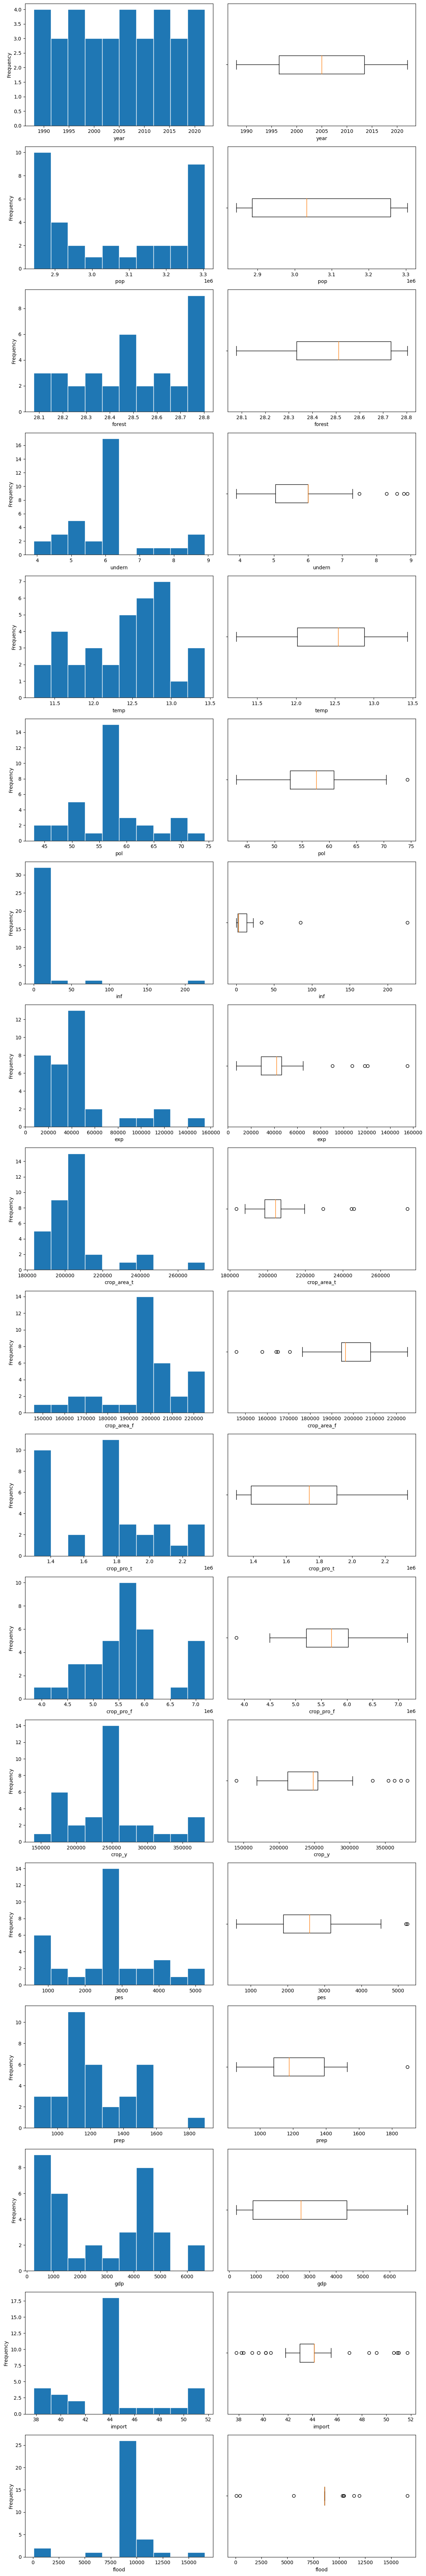

In [10]:
# Define the numerical variables
numerical_vars = ['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood']
# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_imputed[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_imputed[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


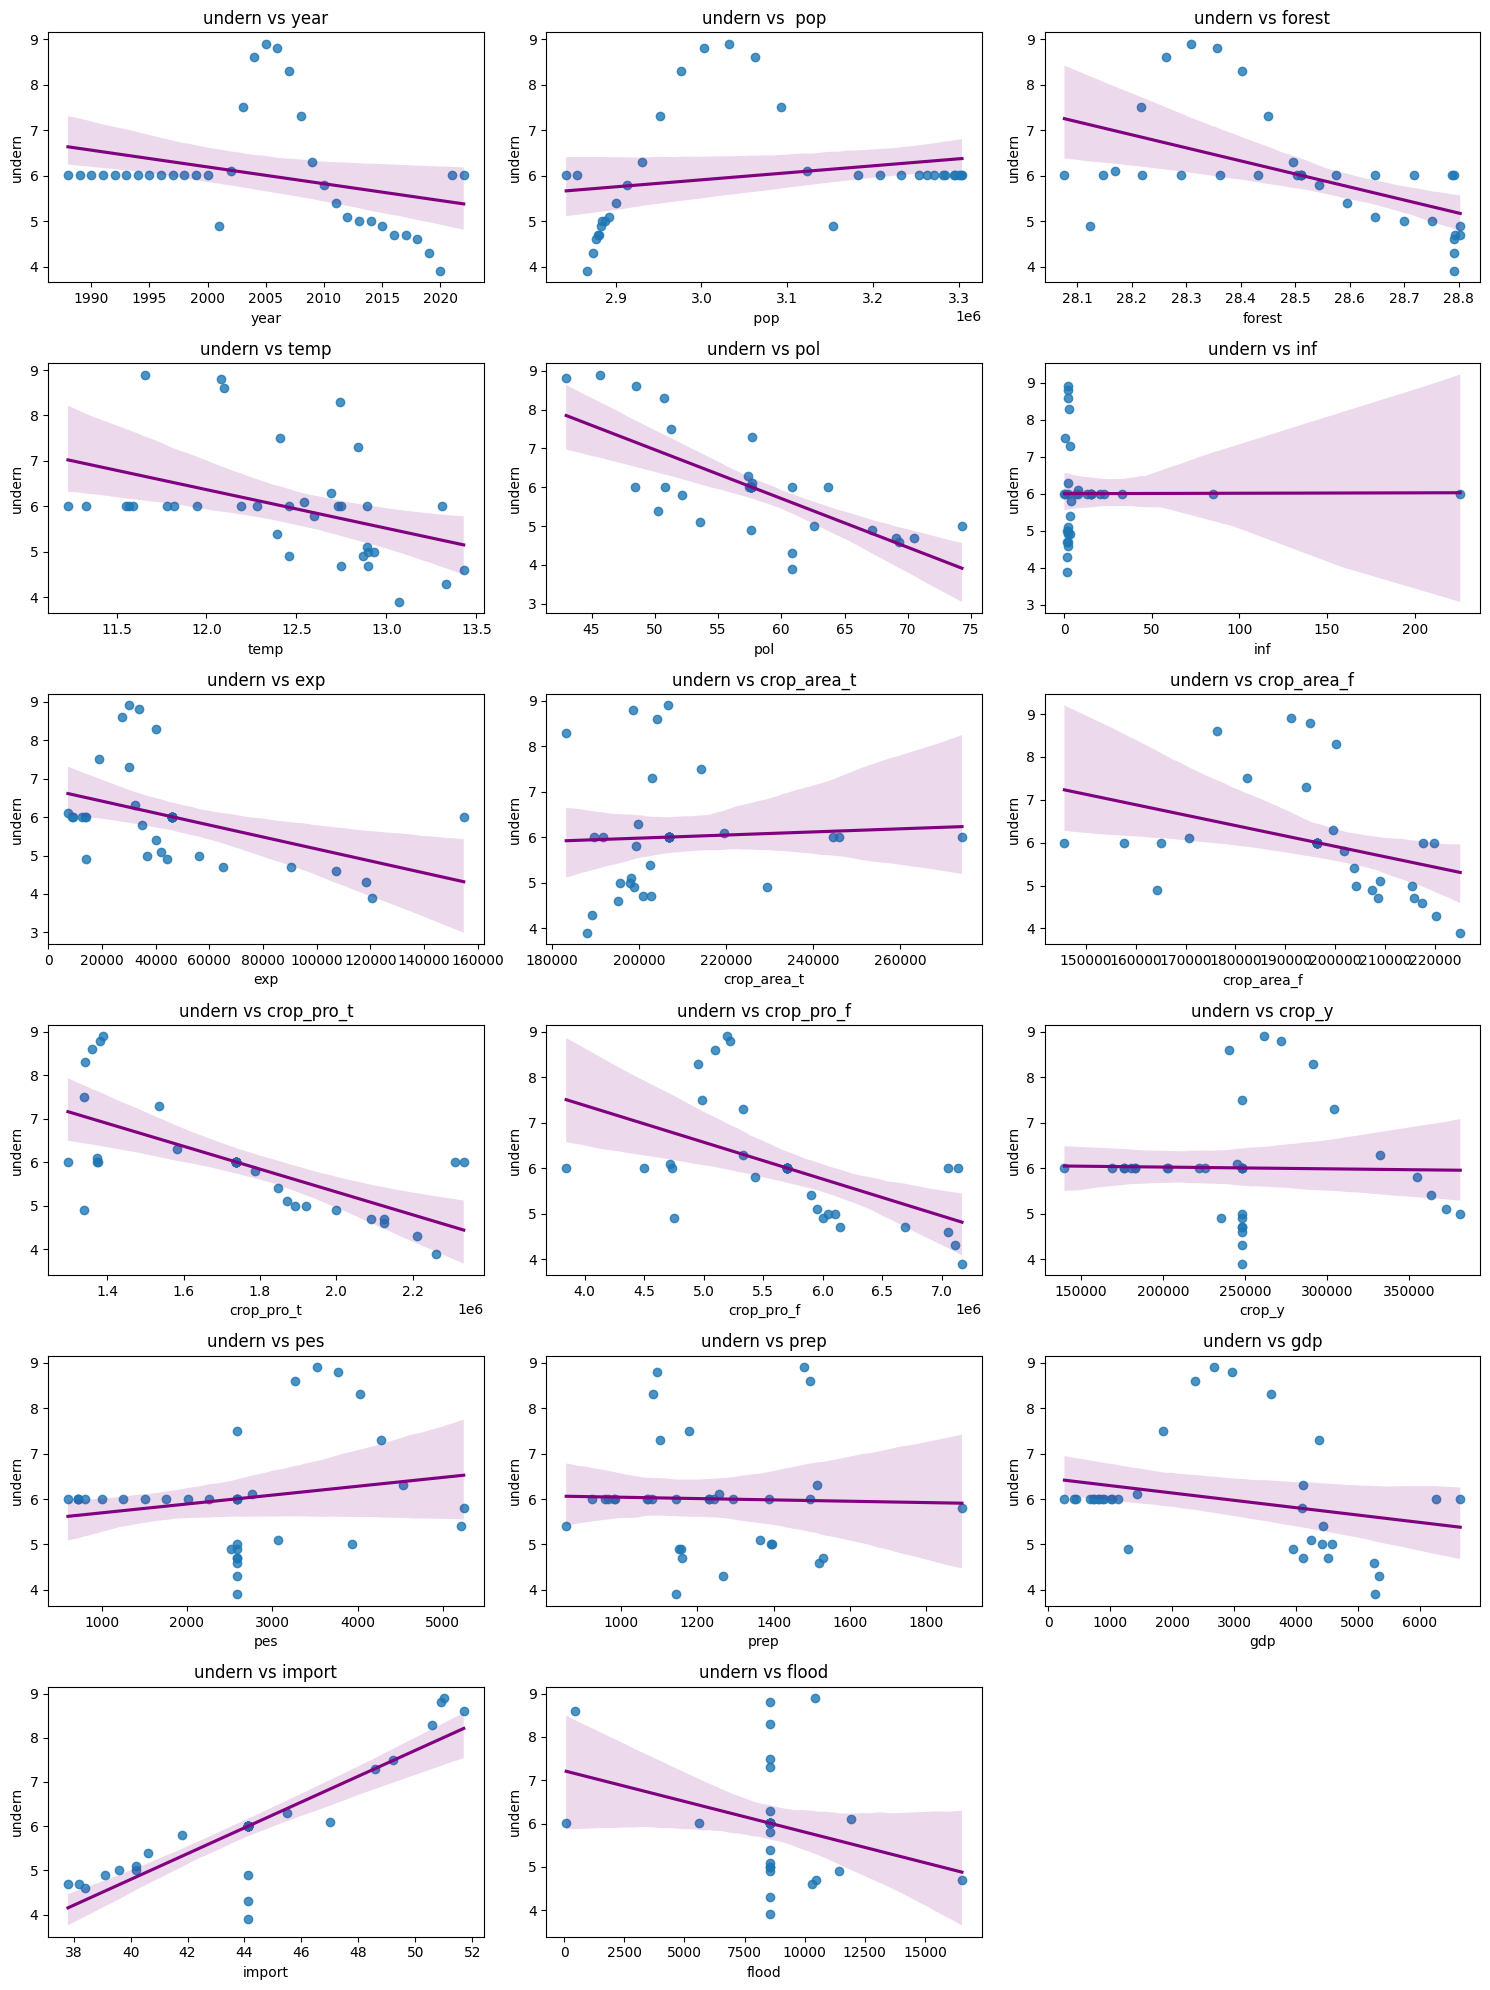

In [11]:
##using scatter plot to check the relationship between the features and target variables
# List of variables to plot against "undern"
variables = ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp', 'crop_area_t',
             'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y', 'pes', 'prep',
             'gdp', 'import', 'flood']
# Set the size of the overall figure
plt.figure(figsize=(15, 20))

# Loop through the variables and create a subplot for each
for i, var in enumerate(variables, 1):
    plt.subplot(6, 3, i)  # Adjust grid dimensions (rows, columns) as needed
    sns.regplot(x=var, y='undern', data=df_imputed, line_kws={'color': 'purple'})
    plt.title(f'undern vs {var}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

from the scatter plot with all the features vs target, we can see that a linear regression model is able to capture some sort of trend between the feature and target variables eventhough the scatter plot itself shows that the data points do no strictly follow a linear regression, but it is a good starting point to make predictions. 

Some notes we made from the scatterplots: 

1)"prep" seems to not have any relationship with "undern" hence we might drop it.

2)"flood" seems to have a negative relationship with "undern" (as number of flood increases, the prevelence of undernourishment decreases) which does not really make sense. But looking at the data it seems that it might be because there is a lack of data about it(missing data) and it occurs randomly. 

3)"inf" does not seem to have a realtionship with "undern", and it may seem that why because of the outlier. However we cannot remove it as these are valid data due to their financial crisis

4)As "import" increases the "undern" also increases and this makes sense because after the Ukraine war the prices of imported good drastically increase and hence food was less affordable. 


## Feature and Target Preparation

In [12]:
def normalize_z(dfin, columns_means=None, columns_stds=None):
    if columns_means is None:
        columns_means= dfin.mean(axis=0)
    if columns_stds is None:
        columns_stds= dfin.std(axis=0)
    dfout= (dfin- columns_means)/ columns_stds
        
    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    df_feature = pd.DataFrame(df.loc[:, feature_names])
    df_target = pd.DataFrame(df.loc[:, target_names]) 

    return df_feature, df_target

def prepare_feature(df_feature):
    cols= df_feature.shape[1]
    if type(df_feature)==pd.DataFrame:
        np_feature= df_feature.to_numpy()
        
    else:
        np_feature= df_feature
    if np_feature.ndim == 1:
        np_feature= np_feature.reshape(-1,cols)
     # Add a column of ones for the intercept term
    ones = np.ones((np_feature.shape[0], 1)) ##X.shape[0] is to find the number of rows in matrix X,
    #and create a numpy array column vector of 1s 
    X = np.concatenate((ones, np_feature), axis=1)
    return X

def prepare_target(df_target):
    cols=df_target.shape[1] ##3 columns
    
    if type(df_target)==pd.DataFrame:
        np_target= df_target.to_numpy()
    else:
        np_target= df_target
        
    target= np_target.reshape(-1,cols)
    
    return target

def predict_linreg(df_feature, beta, means=None, stds=None):
    # Normalize the features using z normalization
    df_feature_normalized, means, stds = normalize_z(df_feature, means, stds)
    
    # Prepare the feature for prediction (add a column of ones for the intercept)
    X = prepare_feature(df_feature_normalized)

    # Calculate the predicted y values
    y_pred = calc_linreg(X, beta)

    return y_pred

def calc_linreg(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    test_index = np.random.choice(indexes, int(len(indexes) * test_size), replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[list(train_index), :]
    df_feature_test = df_feature.loc[list(test_index), :]
    df_target_train = df_target.loc[list(train_index), :]
    df_target_test = df_target.loc[list(test_index), :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_res = np.sum(((y-ypred)**2))
    ss_tot = np.sum(((y-y_mean)**2))

    return 1 - (ss_res / ss_tot)
def mean_squared_error(target, pred):
    summation = np.sum(((target - pred)**2))
    n = target.size
    
    return (1/n) * summation

In [13]:
df_imputed.columns

Index(['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'],
      dtype='object')

In [14]:
# Extract the features and the targets
df_features, df_target = get_features_targets(df_imputed, ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'], ['undern'])

###
### YOUR CODE HERE
print(df_features.shape)

(35, 17)


In [15]:
df_features.describe()
display(df_features)

,year,pop,forest,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,28.510687,11.95,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1068.880000,805.05,44.141176,8576.792222
1,1989,3282182,28.510687,11.55,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1072.010000,860.78,44.141176,8576.792222
2,1990,3295066,28.788321,12.28,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,176310.000000,726.00000,958.690000,675.74,44.141176,8576.792222
3,1991,3302081,28.717153,11.23,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,168855.000000,726.00000,1143.450000,408.02,44.141176,8576.792222
4,1992,3303739,28.645985,11.82,57.646151,226.005421,46226.991165,206958.12,196296.08,1738560.32,5697353.8,180438.000000,726.00000,985.300000,259.75,44.141176,5620.000000
5,1993,3300711,28.574818,11.78,57.646151,85.004751,46226.991165,206958.12,196296.08,1738560.32,5697353.8,202391.000000,605.00000,1081.490000,452.62,44.141176,8576.792222
6,1994,3293999,28.503650,12.75,57.646151,22.565053,46226.991165,206958.12,196296.08,1738560.32,5697353.8,139924.000000,804.00000,924.330000,736.03,44.141176,8576.792222
7,1995,3284364,28.432482,11.59,57.646151,7.793219,46226.991165,206958.12,196296.08,1738560.32,5697353.8,183117.000000,1004.00000,1386.940000,903.99,44.141176,78.000000
8,1996,3271331,28.361314,11.33,57.446808,12.725478,9244.900000,206958.12,196296.08,1738560.32,5697353.8,175963.000000,1255.84000,1495.280000,1009.97,44.141176,8576.792222
9,1997,3253719,28.290146,11.57,57.646151,33.180274,8889.757000,206958.12,196296.08,1738560.32,5697353.8,183020.000000,1507.72000,967.050000,717.38,44.141176,8576.792222


In [16]:
display(df_target)

,undern
0,6.005
1,6.005
2,6.005
3,6.005
4,6.005
5,6.005
6,6.005
7,6.005
8,6.005
9,6.005


## Building Model

In [17]:
def compute_cost_linreg(X, y, beta):
    J=0
    m = y.shape[0]  # Number of training examples
    predictions = calc_linreg(X, beta)
    errors = predictions - y
    squared_errors = np.matmul(errors.T, errors)
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

In [18]:
def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    J_storage = []
    m = y.shape[0]  ## number of training examples
    
    for i in range(num_iters):
        h = calc_linreg(X, beta)  ## calculate predicted value
        loss = h - y  ## calculate the errors
        gradient = np.matmul(X.T, loss) / m  ## caculate X_transposed * errors(loss) / m
        beta = beta - alpha * gradient
        J_storage.append(compute_cost_linreg(X, y, beta))
    
    return beta, J_storage

In [19]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
display(df_features_test)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)
# display(df_features_train_z)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
# display(X)

target = prepare_target(df_target_train)
# display(target)

iterations = 1500
alpha = 0.01
beta = np.zeros((18,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)


##changing the beta value of year to zero as it is just a time stamp
beta[1]=0

# call the predict() method
pred = predict_linreg(df_features_test, beta)
display(pred)

print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())

,year,pop,forest,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
32,2020,2866849,28.791971,13.07,60.849056,1.620887,120586.434800,188030.00,225024.00,2260838.00,7170585.0,248327.652174,2587.94087,1143.640000,5278.99,44.141176,8576.792222
33,2021,2854710,28.791971,12.89,63.679245,2.041472,154831.192800,191741.00,219704.00,2311224.00,7054033.0,248327.652174,2587.94087,1231.348485,6259.76,44.141176,8576.792222
34,2022,2842321,28.510687,13.31,60.849056,6.725203,46226.991165,189778.00,217660.00,2333808.00,7138798.0,248327.652174,2587.94087,1231.348485,6657.64,44.141176,8576.792222
1,1989,3282182,28.510687,11.55,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1072.010000,860.78,44.141176,8576.792222
5,1993,3300711,28.574818,11.78,57.646151,85.004751,46226.991165,206958.12,196296.08,1738560.32,5697353.8,202391.000000,605.00000,1081.490000,452.62,44.141176,8576.792222
6,1994,3293999,28.503650,12.75,57.646151,22.565053,46226.991165,206958.12,196296.08,1738560.32,5697353.8,139924.000000,804.00000,924.330000,736.03,44.141176,8576.792222
13,2001,3153612,28.123248,12.46,57.646151,3.107588,13876.117000,229424.00,164275.00,1340063.00,4750000.0,235173.000000,2515.16000,1158.260000,1283.57,44.141176,8576.792222
18,2006,3003387,28.356277,12.08,42.995171,2.370728,33695.153000,198714.00,194969.00,1382241.00,5222000.0,271643.000000,3774.44000,1094.500000,2972.74,50.900000,8576.792222
26,2014,2884102,28.750511,12.93,74.285713,1.625865,36660.411000,197967.00,204176.00,1920721.00,6100000.0,248327.652174,2587.94087,1392.780000,4584.92,39.600000,8576.792222
31,2019,2873883,28.791971,13.33,60.849056,1.411091,118291.705400,189174.00,220083.00,2210124.00,7115234.0,248327.652174,2587.94087,1266.270000,5345.06,44.141176,8576.792222


array([[6.11352947],
       [6.18707645],
       [5.69178368],
       [5.97336813],
       [6.111526  ],
       [6.31268892],
       [5.80833845],
       [9.02238583],
       [4.03109784],
       [6.04818783]])

mean from custom linear regression: 6.129998261189032
std from custom linear regression: 1.1460915332123558


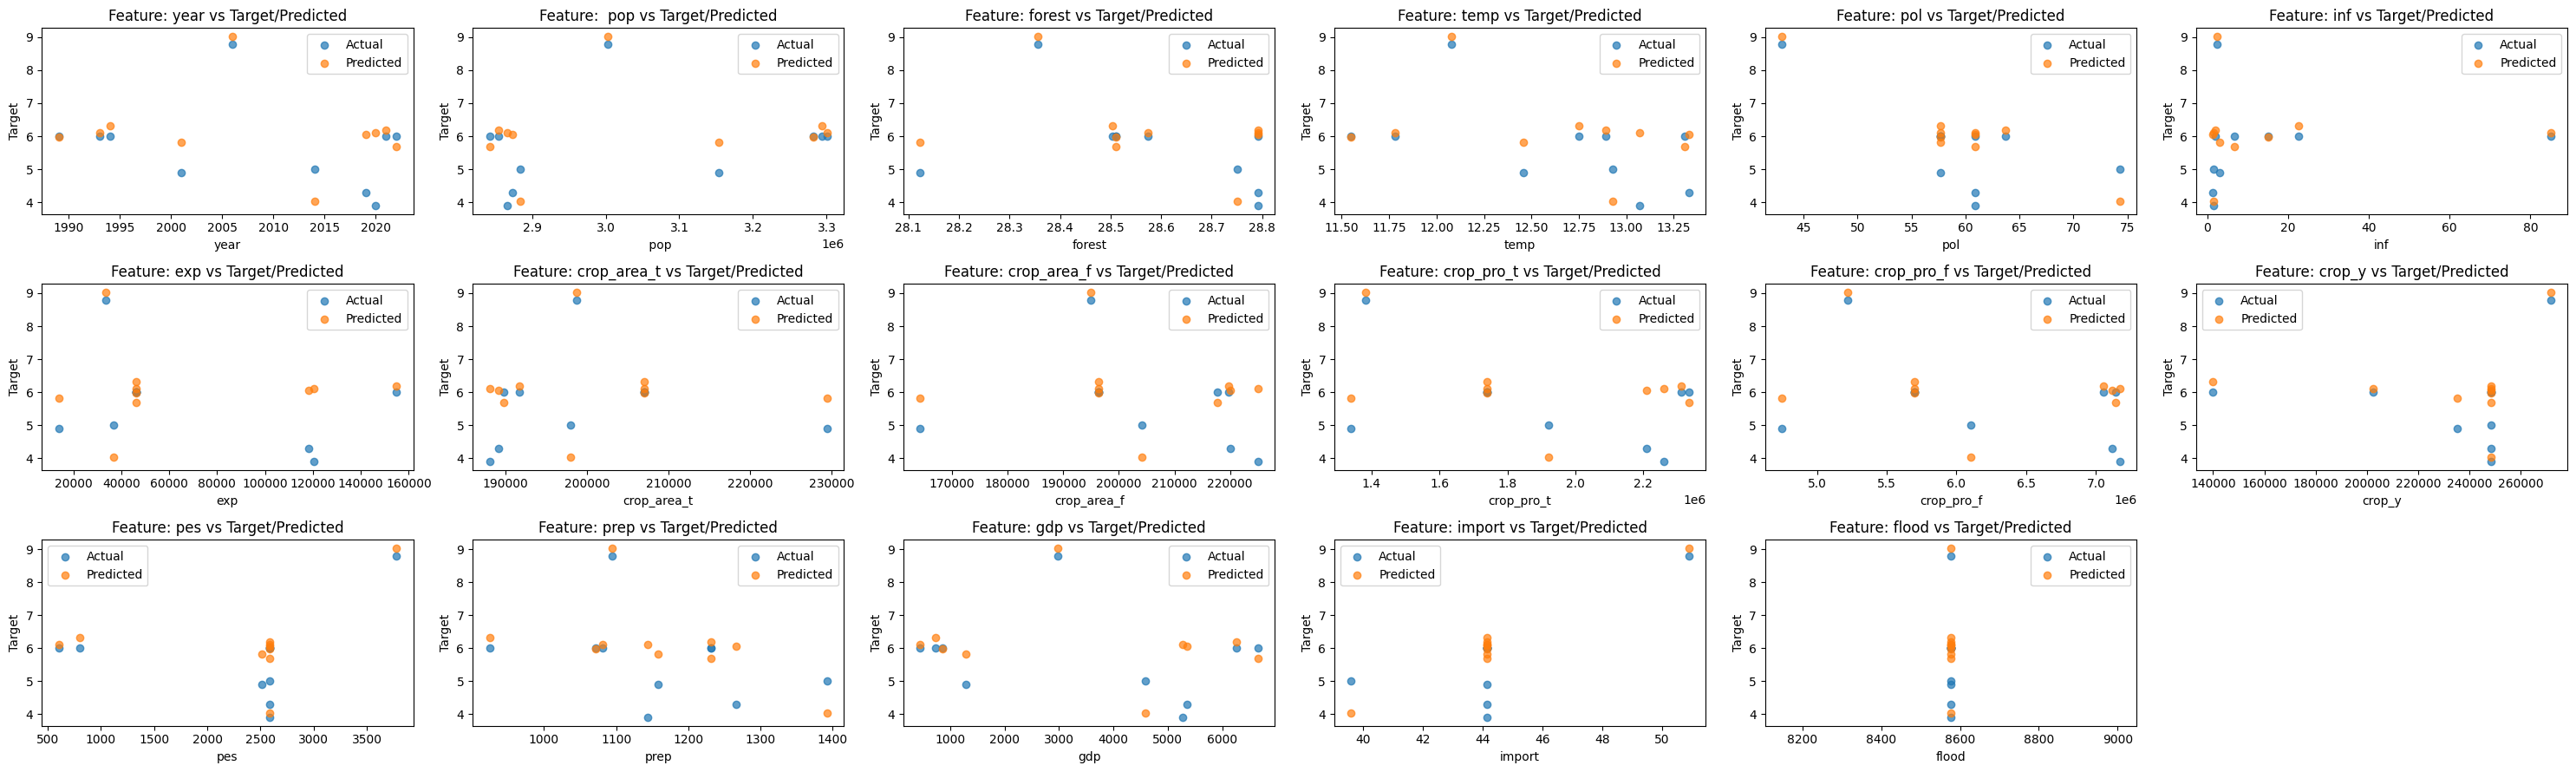

In [20]:
##Visualing how close our predicted values to the actual values


# Number of columns in df_features
n_columns = len(df_features.columns)

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 6

# Setting up the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df_features.columns):
    ax = axes[i]  # Get the corresponding subplot axis
    ax.scatter(df_features_test[column], df_target_test, label='Actual', alpha=0.7)
    ax.scatter(df_features_test[column], pred, label='Predicted', alpha=0.7)
    ax.set_title(f"Feature: {column} vs Target/Predicted")
    ax.set_xlabel(column)
    ax.set_ylabel('Target')
    ax.legend()

# Hide any unused subplots
for i in range(len(df_features.columns), n_rows*n_cols):
    axes[i].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Some of the predicted results are close to the actual values, however there are some predicted points that are far from the actual value. Hence we will check the r-squared value and the mse to evaluate the accuracy of the model.

In [21]:
# Calculate the mse
mse = mean_squared_error(df_target_test, pred)

print(mse)


undern    1.000746
dtype: float64


The mse value is quite high hence it might indicate that this linear regression model may not be the best fit or maybe the data size is too small. Later on we will try to fine tune our model to improve it.

In [22]:
r2 = r2_score(df_target_test, pred)
print(r2)

undern    0.389959
dtype: float64


r-squared value is also alarmingly low which supports the statement we made above. But this maybe also be because we do not have alot of data, hence by increasing the dataset size we can increase the value of r-sqaured.

However we were not able to find more data about Albania for each features.

## Model Result and Evaluation

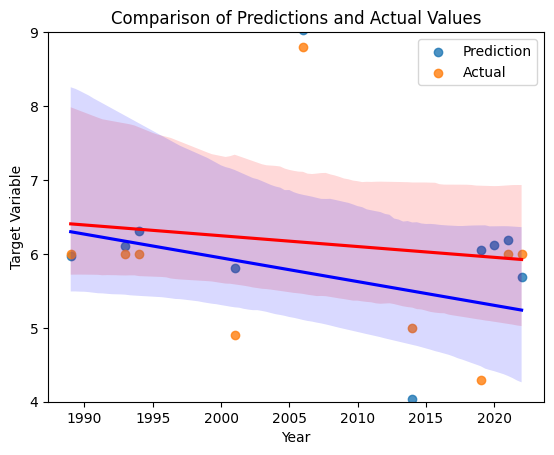

In [23]:
# Plotting the first regression line
sns.regplot(x=df_features_test["year"], y=pred, data=df_imputed, line_kws={'color': 'red'}, label='Prediction')

# Plotting the second regression line
sns.regplot(x=df_features_test["year"], y=df_target_test, data=df_imputed, line_kws={'color': 'blue'}, label='Actual')

# Set the range of the y-axis
plt.ylim([4, 9])  # Adjust y_min and y_max as per your data

# Add legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Target Variable')  # Replace with your actual target variable name
plt.title('Comparison of Predictions and Actual Values')

# Show plot
plt.show()


While the model does start to deviate from the actual value more as time passes, considering that it is a simple linear regression model it is able to capture the trend and is still relatively close to the actual data (the confidence level- the colored area around the lines do overlap more than 70%).

#### Using the beta coefficients to analyse feature importance

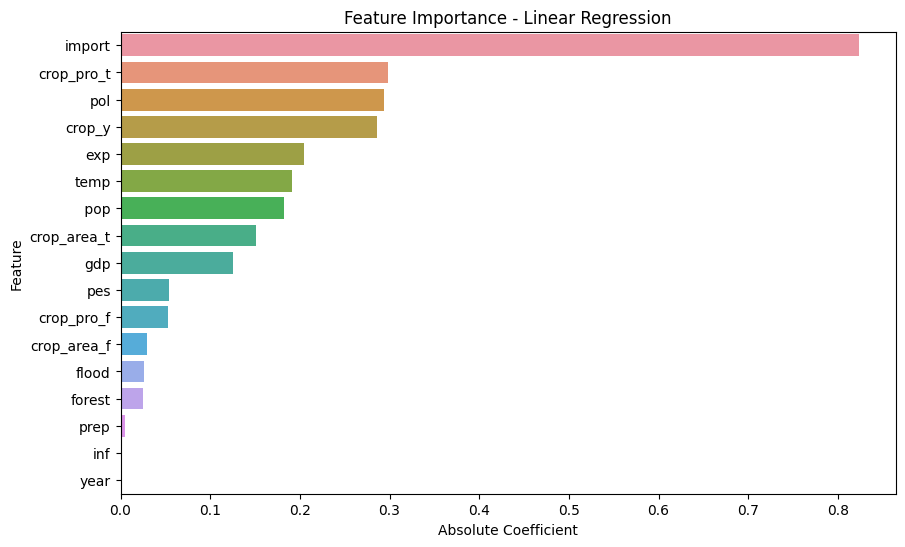

In [24]:
# Assuming beta contains your model coefficients and df_features contains your feature names
# feature_names = ['Intercept'] + list(df_features.columns)
feature_names =  list(df_features.columns)
coefficients = beta[1:].flatten() #exclude B0(intercept) # Adjust this if beta is not a 1D array

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# We use absolute values to understand the magnitude of influence
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort by absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

#### Performing feature analysis to help analyse the most important factor the government to consider to improve the food security issue in Albania.

The top 5 factors the government should consider shifting their policy or pay more close attention to are:

1) imports: Albania are overly reliant on imports as their food resource which are very suspectible to price increase and volaity (as we have seen from the Ukriane War and COVID-19). Hence they would have to shift their policies and help to advocate for self dependency and increase the amount of local crop productions and yield for local use as we can see from factor 2 and 4.
2) crop production level and crop yield
3) export level
4) political stability

#### Evaluation of model
Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

As mentioned, the mse value is very high and the r^2 value is very low, meaning that our model does not fit the data well. There maybe many reasons like, depedent varaibles, bad model parameters, outliers and unfavorable data handling methods. Hence we will try to improve these aspects.

## Model Improvements

#### Improvement 1A: imputing missing values with median

In [25]:
df = pd.read_csv('Albania_2d.csv')

In [26]:
# Find the columns in the dataset
df.columns

Index(['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'],
      dtype='object')

In [27]:
# Impute missing values using mean
df_median = df.fillna(df.median())
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       35 non-null     float64
 3   undern       35 non-null     float64
 4   temp         35 non-null     float64
 5   pol          35 non-null     float64
 6   inf          35 non-null     float64
 7   exp          35 non-null     float64
 8   crop_area_t  35 non-null     float64
 9   crop_area_f  35 non-null     float64
 10  crop_pro_t   35 non-null     float64
 11  crop_pro_f   35 non-null     float64
 12  crop_y       35 non-null     float64
 13  pes          35 non-null     float64
 14  prep         35 non-null     float64
 15  gdp          35 non-null     float64
 16  import       35 non-null     float64
 17  flood        35 non-null     float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB


In [28]:
display(df_median)

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,28.523175,5.25,11.95,57.559383,2.366582,34368.31200,199820.0,201831.0,1786742.0,5429000.0,235173.0,2515.16,1068.88,805.05,41.8,10410.00
1,1989,3282182,28.523175,5.25,11.55,57.559383,2.366582,34368.31200,199820.0,201831.0,1786742.0,5429000.0,235173.0,2515.16,1072.01,860.78,41.8,10410.00
2,1990,3295066,28.788321,5.25,12.28,57.559383,2.366582,34368.31200,199820.0,201831.0,1786742.0,5429000.0,176310.0,726.00,958.69,675.74,41.8,10410.00
3,1991,3302081,28.717153,5.25,11.23,57.559383,2.366582,34368.31200,199820.0,201831.0,1786742.0,5429000.0,168855.0,726.00,1143.45,408.02,41.8,10410.00
4,1992,3303739,28.645985,5.25,11.82,57.559383,226.005421,34368.31200,199820.0,201831.0,1786742.0,5429000.0,180438.0,726.00,985.30,259.75,41.8,5620.00
5,1993,3300711,28.574818,5.25,11.78,57.559383,85.004751,34368.31200,199820.0,201831.0,1786742.0,5429000.0,202391.0,605.00,1081.49,452.62,41.8,10410.00
6,1994,3293999,28.503650,5.25,12.75,57.559383,22.565053,34368.31200,199820.0,201831.0,1786742.0,5429000.0,139924.0,804.00,924.33,736.03,41.8,10410.00
7,1995,3284364,28.432482,5.25,11.59,57.559383,7.793219,34368.31200,199820.0,201831.0,1786742.0,5429000.0,183117.0,1004.00,1386.94,903.99,41.8,78.00
8,1996,3271331,28.361314,5.25,11.33,57.446808,12.725478,9244.90000,199820.0,201831.0,1786742.0,5429000.0,175963.0,1255.84,1495.28,1009.97,41.8,10410.00
9,1997,3253719,28.290146,5.25,11.57,57.559383,33.180274,8889.75700,199820.0,201831.0,1786742.0,5429000.0,183020.0,1507.72,967.05,717.38,41.8,10410.00


In [29]:
df_features, df_target = get_features_targets(df_median, ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'], ['undern'])

###
### YOUR CODE HERE
print(df_features.shape)

(35, 17)


In [30]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_train)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)
# display(df_features_train_z)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
# display(X)

target = prepare_target(df_target_train)
# display(target)

iterations = 1500
alpha = 0.01
beta = np.zeros((18,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)


##changing the beta value of year to zero as it is just a time stamp
beta[1]=0
# call the predict() method
pred = predict_linreg(df_features_test, beta)



print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())

[[ 5.82799835e+00]
 [ 0.00000000e+00]
 [-2.36450334e-01]
 [ 7.92379811e-02]
 [-1.90773833e-01]
 [-2.94979490e-01]
 [ 6.40951932e-03]
 [ 1.91745430e-01]
 [-1.62282517e-01]
 [ 1.62775968e-03]
 [-3.17712759e-01]
 [-2.31726100e-02]
 [-2.73850228e-01]
 [ 6.18301547e-02]
 [ 1.17567327e-02]
 [ 1.13435963e-01]
 [ 9.12372964e-01]
 [ 1.90612744e-02]]
mean from custom linear regression: nan
std from custom linear regression: nan


Since "flood" has too many missing variables, the std from the df_features_test is zero leading to Nan prediction, hence we will drop it. 

In [31]:
df_median=df_median.drop(["flood"],axis=1)

In [32]:
df_features, df_target = get_features_targets(df_median, ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import'], ['undern'])


In [33]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_train)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)
# display(df_features_train_z)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
# display(X)

target = prepare_target(df_target_train)
# display(target)

iterations = 1500
alpha = 0.01
beta = np.zeros((17,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)


##changing the beta value of year to zero as it is just a time stamp
beta[1]=0
# call the predict() method
pred = predict_linreg(df_features_test, beta)



print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())
mse = mean_squared_error(df_target_test, pred)

print(f'mse:{mse}')
r2 = r2_score(df_target_test, pred)
print(f"r2:{r2}")

mean from custom linear regression: 5.827998346853128
std from custom linear regression: 1.1794989624140295
mse:undern    0.678823
dtype: float64
r2:undern    0.561207
dtype: float64


There is an improvement in the r-sqaured values and mse hence maybe using the median to impute the missing data is a better option than using the mean

#### Improvement 1B: Imputing With LOCF

In [34]:
df = pd.read_csv('Albania_2d.csv')

In [35]:
df_lofc = df.fillna(method='ffill')
df_lofc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       33 non-null     float64
 3   undern       22 non-null     float64
 4   temp         35 non-null     float64
 5   pol          27 non-null     float64
 6   inf          31 non-null     float64
 7   exp          27 non-null     float64
 8   crop_area_t  25 non-null     float64
 9   crop_area_f  25 non-null     float64
 10  crop_pro_t   25 non-null     float64
 11  crop_pro_f   25 non-null     float64
 12  crop_y       33 non-null     float64
 13  pes          33 non-null     float64
 14  prep         35 non-null     float64
 15  gdp          35 non-null     float64
 16  import       21 non-null     float64
 17  flood        31 non-null     float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB


In [36]:
df_imputed= df_lofc.fillna(method='bfill')
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       35 non-null     float64
 3   undern       35 non-null     float64
 4   temp         35 non-null     float64
 5   pol          35 non-null     float64
 6   inf          35 non-null     float64
 7   exp          35 non-null     float64
 8   crop_area_t  35 non-null     float64
 9   crop_area_f  35 non-null     float64
 10  crop_pro_t   35 non-null     float64
 11  crop_pro_f   35 non-null     float64
 12  crop_y       35 non-null     float64
 13  pes          35 non-null     float64
 14  prep         35 non-null     float64
 15  gdp          35 non-null     float64
 16  import       35 non-null     float64
 17  flood        35 non-null     float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB


In [37]:
display(df_imputed)

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,28.788321,4.9,11.95,57.446808,226.005421,9244.90000,274120.0,145743.0,1375303.0,3843948.0,176310.0,726.00,1068.88,805.05,47.0,5620.00
1,1989,3282182,28.788321,4.9,11.55,57.446808,226.005421,9244.90000,274120.0,145743.0,1375303.0,3843948.0,176310.0,726.00,1072.01,860.78,47.0,5620.00
2,1990,3295066,28.788321,4.9,12.28,57.446808,226.005421,9244.90000,274120.0,145743.0,1375303.0,3843948.0,176310.0,726.00,958.69,675.74,47.0,5620.00
3,1991,3302081,28.717153,4.9,11.23,57.446808,226.005421,9244.90000,274120.0,145743.0,1375303.0,3843948.0,168855.0,726.00,1143.45,408.02,47.0,5620.00
4,1992,3303739,28.645985,4.9,11.82,57.446808,226.005421,9244.90000,274120.0,145743.0,1375303.0,3843948.0,180438.0,726.00,985.30,259.75,47.0,5620.00
5,1993,3300711,28.574818,4.9,11.78,57.446808,85.004751,9244.90000,274120.0,145743.0,1375303.0,3843948.0,202391.0,605.00,1081.49,452.62,47.0,5620.00
6,1994,3293999,28.503650,4.9,12.75,57.446808,22.565053,9244.90000,274120.0,145743.0,1375303.0,3843948.0,139924.0,804.00,924.33,736.03,47.0,5620.00
7,1995,3284364,28.432482,4.9,11.59,57.446808,7.793219,9244.90000,274120.0,145743.0,1375303.0,3843948.0,183117.0,1004.00,1386.94,903.99,47.0,78.00
8,1996,3271331,28.361314,4.9,11.33,57.446808,12.725478,9244.90000,274120.0,145743.0,1375303.0,3843948.0,175963.0,1255.84,1495.28,1009.97,47.0,78.00
9,1997,3253719,28.290146,4.9,11.57,57.446808,33.180274,8889.75700,274120.0,145743.0,1375303.0,3843948.0,183020.0,1507.72,967.05,717.38,47.0,78.00


In [38]:
df_features, df_target = get_features_targets(df_imputed, ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'], ['undern'])

In [39]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_train)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)
# display(df_features_train_z)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
# display(X)

target = prepare_target(df_target_train)
# display(target)

iterations = 1500
alpha = 0.01
beta = np.zeros((18,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)


##changing the beta value of year to zero as it is just a time stamp
beta[1]=0
# call the predict() method
pred = predict_linreg(df_features_test, beta)



print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())
mse = mean_squared_error(df_target_test, pred)

print(f'mse:{mse}')
r2 = r2_score(df_target_test, pred)
print(f"r2:{r2}")

mean from custom linear regression: 5.687998386564961
std from custom linear regression: 1.0293723587302777
mse:undern    0.869612
dtype: float64
r2:undern    0.53156
dtype: float64


Since imputed with median results in better r^2 and mse values, we will proceed with df_median DataFrame

#### Improvement 2: Checking for Multicollinearlity and dropping dependent variables

In [40]:
df_median.columns

Index(['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import'],
      dtype='object')

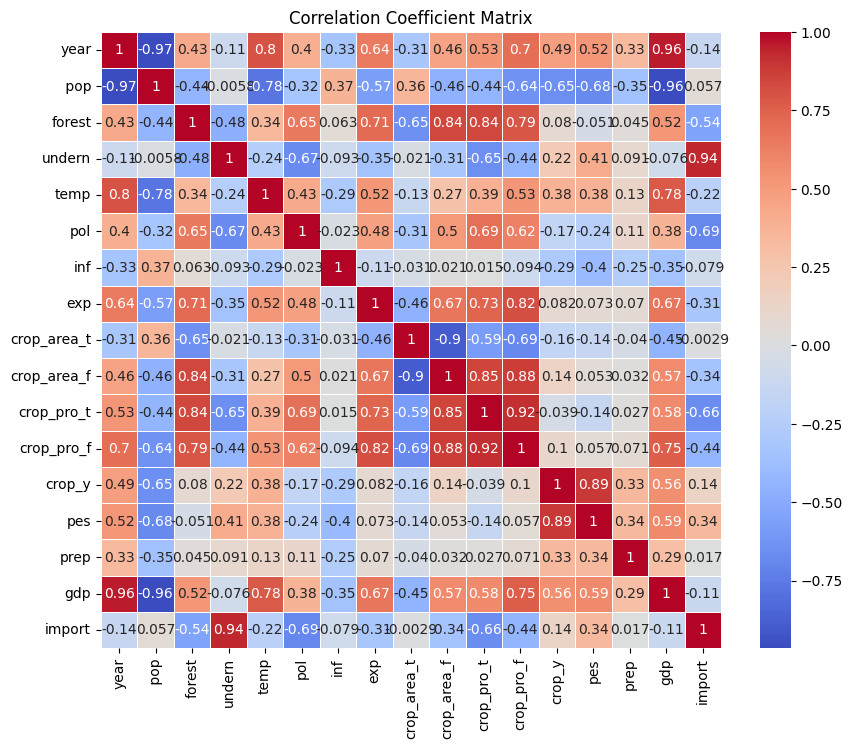

In [41]:
##checking correlation matrix to check for independency
# Define the numerical variables
numerical_vars = ['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import']
df_num=df_median[numerical_vars]
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

When making a multi-Linear regression, we cannot have multicollinearity. Hence we plan to drop if the correlation cofficient is above 0.7 or below -0.7 and keep the variable among the two that has a higher correlation to our target variable 'undern'. So from the correlation matrix we will drop, "crop_pro_f", "pes", "crop_area_f"," pop","forest","exp","temp",'pol".

In [42]:
##dropping multicollinearity
df_median= df_median.drop(["crop_pro_f", "pes", "crop_area_f"," pop","temp","forest","exp",'pol'], axis=1)

In [43]:
df_median.columns

Index(['year', 'undern', 'inf', 'crop_area_t', 'crop_pro_t', 'crop_y', 'prep',
       'gdp', 'import'],
      dtype='object')

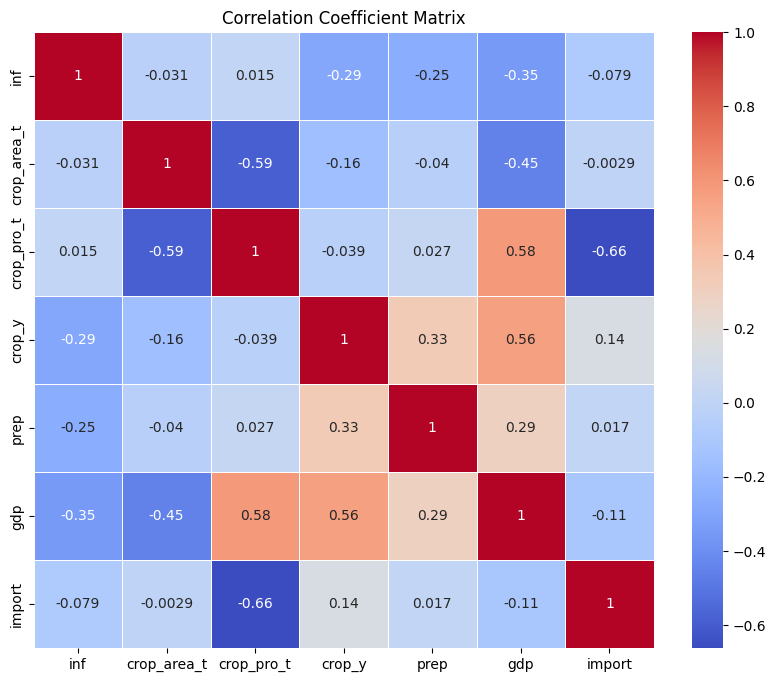

In [44]:
##checking correlation matrix to check for independency again
# Define the numerical variables
numerical_vars = [ 'inf', 'crop_area_t', 'crop_pro_t', 'crop_y', 'prep',
       'gdp', 'import']
df_num=df_median[numerical_vars]
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

Now all the correlation values are less than 0.7 which we deem to be critical, hence we can proceed to train our model using the the Multiple linear regression learnt in week 9.

In [45]:

# Extract the features after dropping and the targets
df_features, df_target = get_features_targets(df_median, ['year', 'inf',
       'crop_area_t', 'crop_pro_t', 'crop_y', 'prep', 'gdp', 'import'], ['undern'])

# # Normalize using z normalization
# df_features,_,_ = normalize_z(df_features)

###
### YOUR CODE HERE
print(df_features.shape)

(35, 8)


In [46]:
df_features.describe()
display(df_features)

,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,1988,2.366582,199820.0,1786742.0,235173.0,1068.88,805.05,41.8
1,1989,2.366582,199820.0,1786742.0,235173.0,1072.01,860.78,41.8
2,1990,2.366582,199820.0,1786742.0,176310.0,958.69,675.74,41.8
3,1991,2.366582,199820.0,1786742.0,168855.0,1143.45,408.02,41.8
4,1992,226.005421,199820.0,1786742.0,180438.0,985.30,259.75,41.8
5,1993,85.004751,199820.0,1786742.0,202391.0,1081.49,452.62,41.8
6,1994,22.565053,199820.0,1786742.0,139924.0,924.33,736.03,41.8
7,1995,7.793219,199820.0,1786742.0,183117.0,1386.94,903.99,41.8
8,1996,12.725478,199820.0,1786742.0,175963.0,1495.28,1009.97,41.8
9,1997,33.180274,199820.0,1786742.0,183020.0,967.05,717.38,41.8


In [47]:
##Train model
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_test)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)

target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

##changing the beta value of year to zero as it is just a time stamp
beta[1]=0

# call the predict() method
pred = predict_linreg(df_features_test, beta)

print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())

mean from custom linear regression: 5.827998346853129
std from custom linear regression: 1.0494021785552368


In [48]:
mse = mean_squared_error(df_target_test, pred)

print(mse)


undern    0.552594
dtype: float64


In [49]:
r2 = r2_score(df_target_test, pred)
print(r2)

undern    0.642802
dtype: float64


From trying to drop variables such that the maximum correlation value ranges from +-0.8 to +- 0.5, the best r^2 value and mse was obtain when we dropped "crop_pro_f", "pes", "crop_area_f"," pop","temp","forest","exp",'pol', ' pop' and 'flood'. We did not drop more as it would lead to overfitting results. 


Compared to including correlated variables, dropping them really helps to improve the accuaray of the model. Hence we will continue with dropping some variables.

#### Improvement 3: Fine-Tuning the parameters

In [50]:
##Finding the best parameters
from sklearn.metrics import r2_score, mean_squared_error

# Define ranges for alpha and iterations
alpha_values = [0.001, 0.01, 0.05, 0.1, 0.2]
iteration_values = [500, 1000, 1500, 2000, 2500, 3000]

# Initialize variables to store the best scores and corresponding parameters
best_r2 = -np.inf
best_mse = np.inf
best_alpha = None
best_iterations = None
best_beta = None

for alpha in alpha_values:
    for iterations in iteration_values:
        beta = np.zeros((X.shape[1], 1))  # Initialize beta for each combination

        # Train the model
        beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

        # Prediction on test set
        pred = predict_linreg(df_features_test, beta)

        # Ensure pred is a numpy array
        if isinstance(pred, pd.Series):
            pred = pred.values

        # Calculate R-squared and MSE
        r2 = r2_score(df_target_test, pred)
        mse = mean_squared_error(df_target_test, pred)

        # Update best scores and parameters if the current combination is better
        if r2 > best_r2 and mse < best_mse:
            best_r2 = r2
            best_mse = mse
            best_alpha = alpha
            best_iterations = iterations
            best_beta = beta

print(f"Best R-squared: {best_r2}")
print(f"Best MSE: {best_mse}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Iterations: {best_iterations}")


Best R-squared: 0.8066035091283966
Best MSE: 0.2991892062906424
Best Alpha: 0.001
Best Iterations: 2500


In [74]:
##Train model
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_test)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)

target = prepare_target(df_target_train)

iterations = 3000
alpha = 0.001
beta = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

##changing the beta value of year to zero as it is just a time stamp
beta[1]=0

# call the predict() method
pred = predict_linreg(df_features_test, beta)

print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())
mse = mean_squared_error(df_target_test, pred)
print(f"mse:{mse}")
r2 = r2_score(df_target_test, pred)
print(f"r2:{r2}")

mean from custom linear regression: 5.538276167779442
std from custom linear regression: 0.982509905474002
mse:0.3175007216915782
r2:0.7947669095899691


We chose alpha= 0.001 and number of iteration to be 3000 as it gives better results in general (even in cross validation later on)
By fine-tuning the alpha value and the number of iterations, we improved the value of the r-squared and mse. Hence we will proceed with these parameters.

#### Improvement 4: Removing Outliers

The variables that have very extreme outliers include:"inf", "exp","crop_area_t","crop_yield","import","flood". We will try to remove them and see if our model improves.

In [75]:
df_median.columns

Index(['year', 'undern', 'inf', 'crop_area_t', 'crop_pro_t', 'crop_y', 'prep',
       'gdp', 'import'],
      dtype='object')

In [76]:
# Apply Winsorization to reduce outliers
numerical_vars_toscale = ['inf','crop_area_t','crop_y','import','prep']
winsorized_df = df_median.copy()
for var in numerical_vars_toscale:
    q_low = df_median[var].quantile(0.05)
    q_high = df_median[var].quantile(0.95)
    winsorized_df[var] = df_median[var].clip(q_low, q_high)

display(winsorized_df)
display(df_median)

,year,undern,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,1988,5.25,2.366582,199820.0,1786742.0,235173.0,1068.880,805.05,41.80
1,1989,5.25,2.366582,199820.0,1786742.0,235173.0,1072.010,860.78,41.80
2,1990,5.25,2.366582,199820.0,1786742.0,176310.0,958.690,675.74,41.80
3,1991,5.25,2.366582,199820.0,1786742.0,173830.6,1143.450,408.02,41.80
4,1992,5.25,48.727617,199820.0,1786742.0,180438.0,985.300,259.75,41.80
5,1993,5.25,48.727617,199820.0,1786742.0,202391.0,1081.490,452.62,41.80
6,1994,5.25,22.565053,199820.0,1786742.0,173830.6,948.382,736.03,41.80
7,1995,5.25,7.793219,199820.0,1786742.0,183117.0,1386.940,903.99,41.80
8,1996,5.25,12.725478,199820.0,1786742.0,175963.0,1495.280,1009.97,41.80
9,1997,5.25,33.180274,199820.0,1786742.0,183020.0,967.050,717.38,41.80


,year,undern,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,1988,5.25,2.366582,199820.0,1786742.0,235173.0,1068.88,805.05,41.8
1,1989,5.25,2.366582,199820.0,1786742.0,235173.0,1072.01,860.78,41.8
2,1990,5.25,2.366582,199820.0,1786742.0,176310.0,958.69,675.74,41.8
3,1991,5.25,2.366582,199820.0,1786742.0,168855.0,1143.45,408.02,41.8
4,1992,5.25,226.005421,199820.0,1786742.0,180438.0,985.30,259.75,41.8
5,1993,5.25,85.004751,199820.0,1786742.0,202391.0,1081.49,452.62,41.8
6,1994,5.25,22.565053,199820.0,1786742.0,139924.0,924.33,736.03,41.8
7,1995,5.25,7.793219,199820.0,1786742.0,183117.0,1386.94,903.99,41.8
8,1996,5.25,12.725478,199820.0,1786742.0,175963.0,1495.28,1009.97,41.8
9,1997,5.25,33.180274,199820.0,1786742.0,183020.0,967.05,717.38,41.8


In [77]:
# Extract the features and the targets
df_features_w, df_target_w = get_features_targets(winsorized_df, ['year', 'inf',
       'crop_area_t', 'crop_pro_t', 'crop_y', 'prep', 'gdp', 'import'], ['undern'])


###
### YOUR CODE HERE
display(df_features_w)

,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,1988,2.366582,199820.0,1786742.0,235173.0,1068.880,805.05,41.80
1,1989,2.366582,199820.0,1786742.0,235173.0,1072.010,860.78,41.80
2,1990,2.366582,199820.0,1786742.0,176310.0,958.690,675.74,41.80
3,1991,2.366582,199820.0,1786742.0,173830.6,1143.450,408.02,41.80
4,1992,48.727617,199820.0,1786742.0,180438.0,985.300,259.75,41.80
5,1993,48.727617,199820.0,1786742.0,202391.0,1081.490,452.62,41.80
6,1994,22.565053,199820.0,1786742.0,173830.6,948.382,736.03,41.80
7,1995,7.793219,199820.0,1786742.0,183117.0,1386.940,903.99,41.80
8,1996,12.725478,199820.0,1786742.0,175963.0,1495.280,1009.97,41.80
9,1997,33.180274,199820.0,1786742.0,183020.0,967.050,717.38,41.80


In [78]:
##Train model
# Split the data set into training and test
df_features_w_train, df_features_w_test, df_target_w_train, df_target_w_test = split_data(df_features_w, df_target_w, random_state=100, test_size=0.3)
# display(df_features_test)

# Normalize the features using z normalization
df_features_train_wz,_,_ = normalize_z(df_features_w_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_wz)

target = prepare_target(df_target_w_train)

iterations = 3000
alpha = 0.001
beta = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

##changing the beta value of year to zero as it is just a time stamp
beta[1]=0

# call the predict() method
pred = predict_linreg(df_features_w_test, beta)

print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())
mse = mean_squared_error(df_target_w_test, pred)
print(f"mse:{mse}")
r2 = r2_score(df_target_test, pred)
print(f"r2:{r2}")

mean from custom linear regression: 5.5382761677794425
std from custom linear regression: 0.9929555825083872
mse:0.31756788041637934
r2:0.7947234980582866


Although removing and replacing the outliers in the 5th and 95th percentiles did improve the accuracy of the model by abit, but it is very slight and it shows that the model is not very sensitive to outliers. Furthermore, these outliers are important and real events that happen in Albania, hence we should not remove it sense it is the actual trends. Thus we will continue without removing outliers(improvemnt 3).

## Improved Model Result

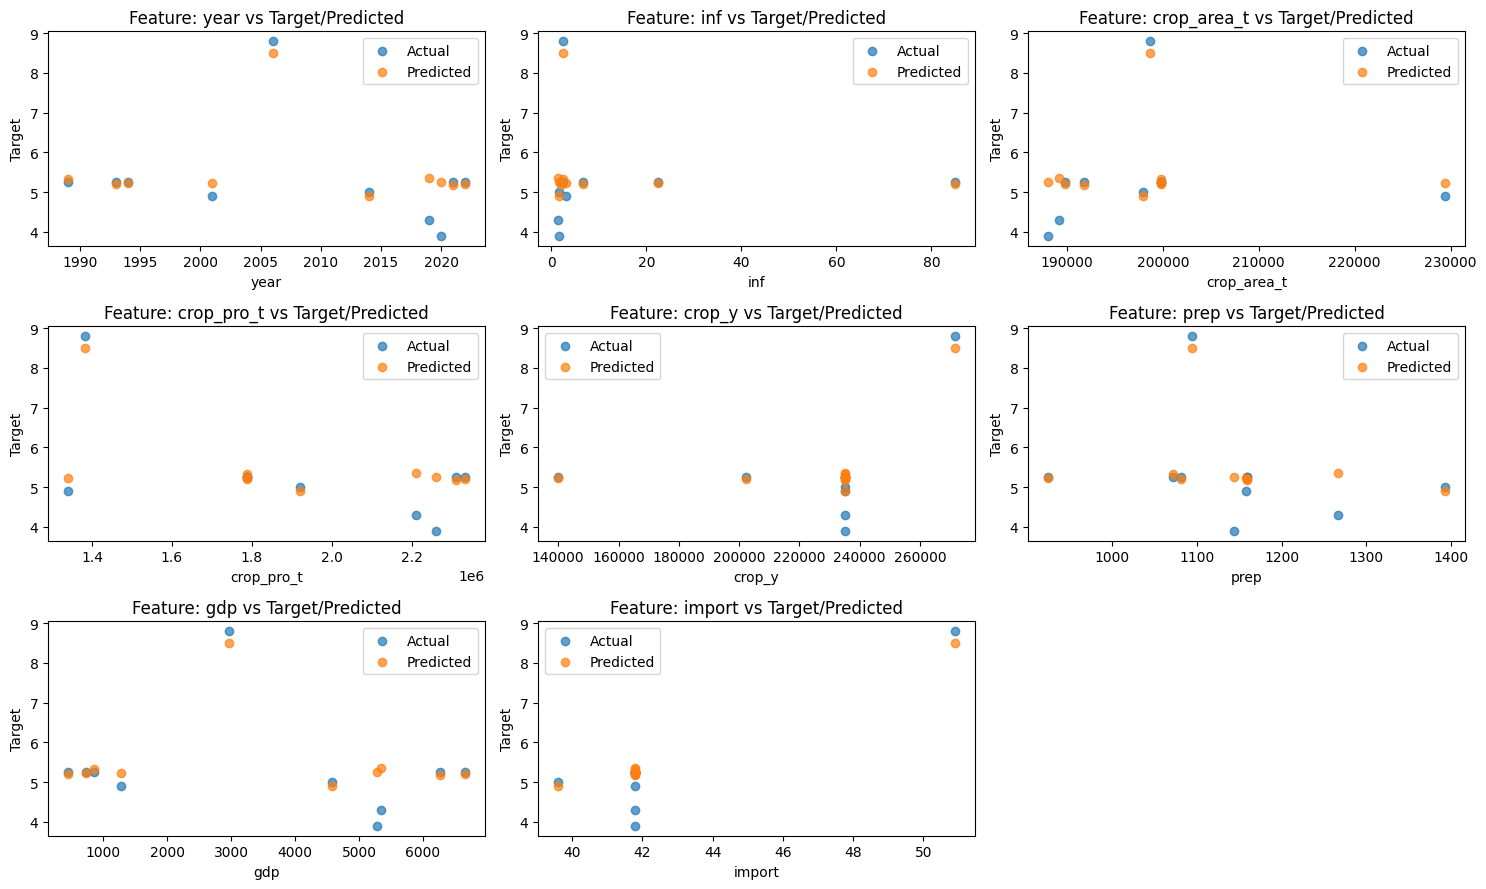

In [79]:
##Visualing how close our predicted values to the actual values
# Number of columns in df_features
n_columns = len(df_features.columns)

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Setting up the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df_features.columns):
    ax = axes[i]  # Get the corresponding subplot axis
    ax.scatter(df_features_test[column], df_target_test, label='Actual', alpha=0.7)
    ax.scatter(df_features_test[column], pred, label='Predicted', alpha=0.7)
    ax.set_title(f"Feature: {column} vs Target/Predicted")
    ax.set_xlabel(column)
    ax.set_ylabel('Target')
    ax.legend()

# Hide any unused subplots
for i in range(len(df_features.columns), n_rows*n_cols):
    axes[i].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Some of the predicted results are close to the actual values. Also, the r-squared value is not alarmingly high (clode to 1 as it means it might be overfitted) and the mse is not too low(very close to 0), hence these improvements has improved our model.

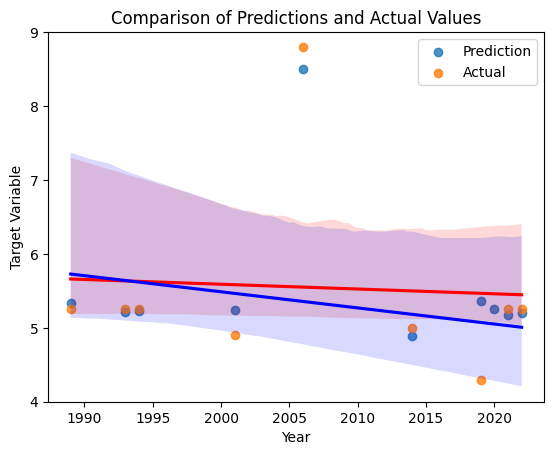

In [80]:
# Plotting the first regression line
sns.regplot(x=df_features_test["year"], y=pred, data=df_median, line_kws={'color': 'red'}, label='Prediction')

# Plotting the second regression line
sns.regplot(x=df_features_test["year"], y=df_target_test, data=df_median, line_kws={'color': 'blue'}, label='Actual')

# Set the range of the y-axis
plt.ylim([4, 9])  # Adjust y_min and y_max as per your data

# Add legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Target Variable')  # Replace with your actual target variable name
plt.title('Comparison of Predictions and Actual Values')

# Show plot
plt.show()

While the model does start to deviate from the actual value more as time passes, considering that it is a simple linear regression model it is able to capture the trend and is still relatively close to the actual data (the confidence level- the colored area around the lines do overlap more than 80%).

#### Using beta coefficient to analyse the feature importance

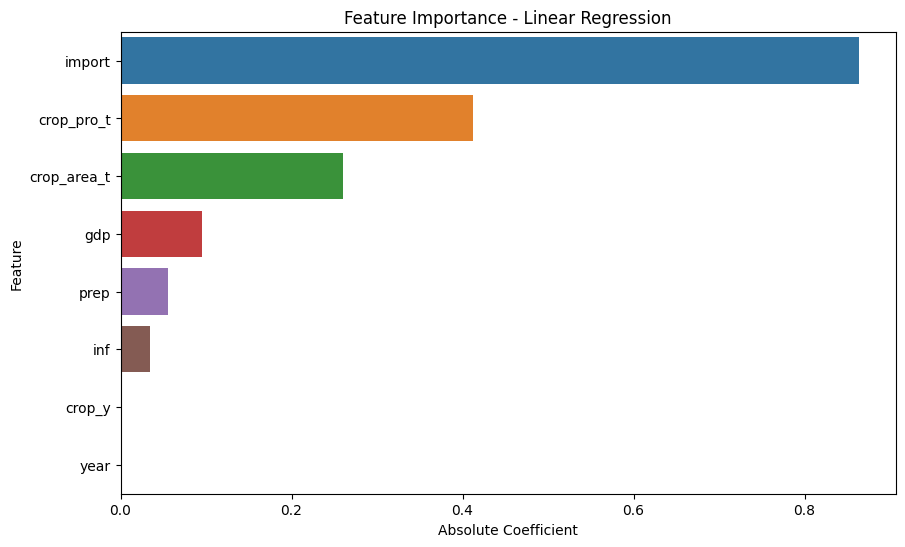

In [81]:
# feature_names = ['Intercept'] + list(df_features.columns)
feature_names =  list(df_features.columns)
coefficients = beta[1:].flatten() #exclude B0(intercept) # Adjust this if beta is not a 1D array

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# We use absolute values to understand the magnitude of influence
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort by absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

#### Performing feature analysis to help analyse the most important factor the government to consider to improve the food security issue in Albania.

The top 5 factors the government should consider shifting their policy or pay more close attention to are:

1) imports: Albania are overly reliant on imports as their food resource which are very suspectible to price increase and volaity (as we have seen from the Ukriane War and COVID-19). Hence they would have to shift their policies and help to advocate for self dependency and increase the amount of local crop productions and yield for local use as we can see from factor 2 and 4.
2) crop production level
3) crop production area
3) GDP per capita
4) precipitation

#### Prediction with our linear regression model


Therefore, we propose leveraging key features such as projected GDP, expected import levels, and anticipated crop yields as inputs for a predictive model. This tool will enable the Albanian government to forecast the prevalence of undernourishment for any given year, based on these variables. By understanding the impact of these factors, policymakers can make informed decisions about which areas to focus on, adjusting policies to achieve desired levels of undernourishment reduction in a specific timeframe.

For example, if they want the percentage of undernourishment to be at 4% by 2044, they can experiment with the GDP per capita, crop yield and import ratio that they need to hit the 4%

In [104]:
future_year=input("What year do you want to predict the undernourishment in Albania?")

In [105]:
future_gdp= input("What is the predicted GDP per capita of that year? in US$")

In [106]:
future_import= input("What is the predicted ratio of food import of the year? ? (1-100)")

In [107]:
future_crop= input("What is the predicted annual crop yield of that year? (in hg/ha)")

#### Training Prediction Model

In [108]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)



# Normalize training data
df_features_train_z, columns_means, columns_stds = normalize_z(df_features_train,columns_means=None, columns_stds=None)


# Store the means and standard deviations
training_mean = columns_means
training_std = columns_stds

# Prepare features and targets
X_train = prepare_feature(df_features_train_z)
target_train = prepare_target(df_target_train)


# Gradient Descent
iterations = 3000
alpha = 0.001
beta = np.zeros((9, 1))
beta, J_storage = gradient_descent_linreg(X_train, target_train, beta, alpha, iterations)

beta[1]=0


# Update last known values to make prediction
last_known_values = df_features.iloc[-1].copy()
last_known_values['year'] = float(future_year)
last_known_values['gdp'] = float(future_gdp)
last_known_values['import'] = float(future_import)
last_known_values['crop_y']= float(future_crop)


# Convert to DataFrame
X_future = pd.DataFrame([last_known_values])
df_features_test = pd.concat([df_features_test, X_future], ignore_index=True)
# display(df_features_test)


# Make prediction
pred = predict_linreg(df_features_test, beta,training_mean,training_std)
print(pred)



[[4.81256678]
 [4.76041472]
 [4.77812738]
 [5.05996394]
 [5.03552881]
 [5.02912853]
 [5.40661226]
 [7.72465995]
 [4.74738522]
 [4.90592357]
 [4.32612285]]


We kept the values of the rest if the features (inf, crop area, prep, flood) to be the same as 2022 as we are asssuming that it would not change as much and its change also has a lesser weightage on prevelence of undernourishment as compared to the key features.

In [109]:
def get_pred(value):
    pred= value.flatten()[-1]
    return f"The predicted percentage of undernourishment in Albania (% of its population) in {future_year} is {pred.round(1)}"
get_pred(pred)

'The predicted percentage of undernourishment in Albania (% of its population) in 2044 is 4.3'

#### Visualising the predicted value with the past trend

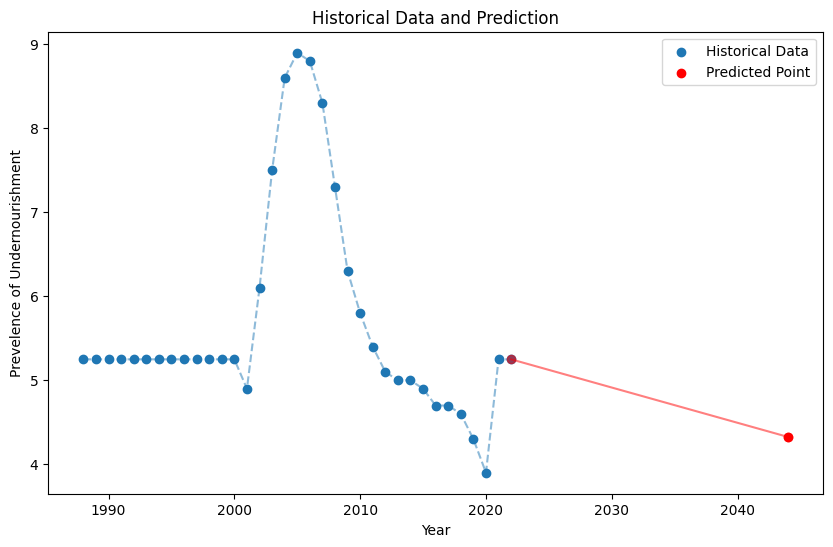

In [110]:
# Assuming df_features_test contains your historical data and 'year' is your x-axis
x_historical = df_features['year']
y_historical = df_target  

# Plot historical data
plt.figure(figsize=(10, 6))
plt.scatter(x_historical, y_historical, label='Historical Data')
plt.plot(x_historical, y_historical, linestyle='--', alpha=0.5)

# Add predicted point
# 'pred' is your predicted value, and 'future_year' is the year of prediction
x_future = last_known_values["year"]
y_future = pred.flatten()[-1]
plt.scatter(x_future, y_future, color='red', label='Predicted Point')

# Connect the last known point to the predicted point
last_known_year = x_historical.iloc[-1]
last_known_value = y_historical.iloc[-1]

# Ensure these are scalar values for plotting
last_known_year = float(last_known_year)
last_known_value = float(last_known_value)
x_future = float(x_future)
y_future = float(y_future)

plt.plot([last_known_year, x_future], [last_known_value, y_future], color='red', linestyle='-', marker='o',alpha=0.5)

# Labeling the plot
plt.xlabel('Year')
plt.ylabel('Prevelence of Undernourishment')  # Replace with your target variable name
plt.title('Historical Data and Prediction')
plt.legend()

# Show plot
plt.show()


It is now easy for policy makers to compare the % for the year they want to predict with the expected gdp, import and crop yield with the past trend and see where the country is heading.

#### Future Forecasting

We will now utilize the sklearn Linear Regression model to forecast the key features—GDP, imports, and crop yield—from 2023 to 2100. This will allow us to generate a projected graph of the prevalence of undernourishment. This graph will serve as a valuable tool for the government, enabling them to assess potential changes in undernourishment percentages based on the anticipated trends of these key economic and agricultural indicators.

Furthermore, to offer flexibility and adaptability to the government's planning processes, our model is designed to incorporate alternate data sets. If the government prefers to use their own projections for GDP, imports, and crop yield, they can easily integrate this data into our model by replacing the data in the 'future_forecast' DataFrame. This feature ensures that our predictive model remains relevant and aligned with the government's realistic expectations and objectives.

***Note: We got an approval from Prof Yannic to use sklearn for this section

In [111]:
def train_gdp_model(df_i):
    df_feature_year, df_target_gdp = get_features_targets(df_i, "year", "gdp")
    df_feature_year_train, df_feature_year_test, df_target_gdp_train, df_target_gdp_test = split_data(df_feature_year, df_target_gdp, random_state=100, test_size=0.3)

    lr = LinearRegression()
    lr.fit(df_feature_year_train, df_target_gdp_train)
    return lr

def train_import_model(df):
    df_feature_year, df_target_import = get_features_targets(df, "year", "import")
    df_feature_year_train, df_feature_year_test, df_target_import_train, df_target_import_test = split_data(df_feature_year, df_target_import, random_state=100, test_size=0.3)

    lr_import = LinearRegression()
    lr_import.fit(df_feature_year_train, df_target_import_train)
    return lr_import

def train_crop_yield_model(df):
    df_feature_year, df_target_crop_yield = get_features_targets(df, "year", "crop_y")
    df_feature_year_train, df_feature_year_test, df_target_crop_yield_train, df_target_crop_yield_test = split_data(df_feature_year, df_target_crop_yield, random_state=100, test_size=0.3)

    lr_crop_yield = LinearRegression()
    lr_crop_yield.fit(df_feature_year_train, df_target_crop_yield_train)
    return lr_crop_yield


# Train the model once using all available historical data
gdp_forecasting_model = train_gdp_model(df_median)
import_forecasting_model = train_import_model(df_median)
crop_yield_forecasting_model = train_crop_yield_model(df_median)


years = range(2023, 2101)
future_years = np.array(years).reshape(-1, 1)  # Reshape for prediction

# Predict future values
future_import_predictions = import_forecasting_model.predict(future_years)
future_crop_yield_predictions = crop_yield_forecasting_model.predict(future_years)
future_gdp_predictions=gdp_forecasting_model.predict(future_years)

# Combine future years and predictions into a DataFrame
future_forecasts = pd.DataFrame({
    'year': years,
    'gdp': future_gdp_predictions.flatten(),
    'import': future_import_predictions.flatten(),
    'crop_y': future_crop_yield_predictions.flatten()
})
# Predict future GDP for all years in one step
future_gdp_predictions = gdp_forecasting_model.predict(future_years)

# Combine future years and predictions
# future_forecasts_gdp = pd.DataFrame({'year': years, 'gdp': future_gdp_predictions.flatten()})
display(future_forecasts)

,year,gdp,import,crop_y
0,2023,5918.000795,41.747889,338990.661651
1,2024,6094.889667,41.676484,343586.326664
2,2025,6271.778539,41.605080,348181.991678
3,2026,6448.667412,41.533675,352777.656691
4,2027,6625.556284,41.462270,357373.321704
...,...,...,...,...
73,2096,18830.888478,36.535356,674474.207609
74,2097,19007.777351,36.463951,679069.872622
75,2098,19184.666223,36.392547,683665.537635
76,2099,19361.555095,36.321142,688261.202648


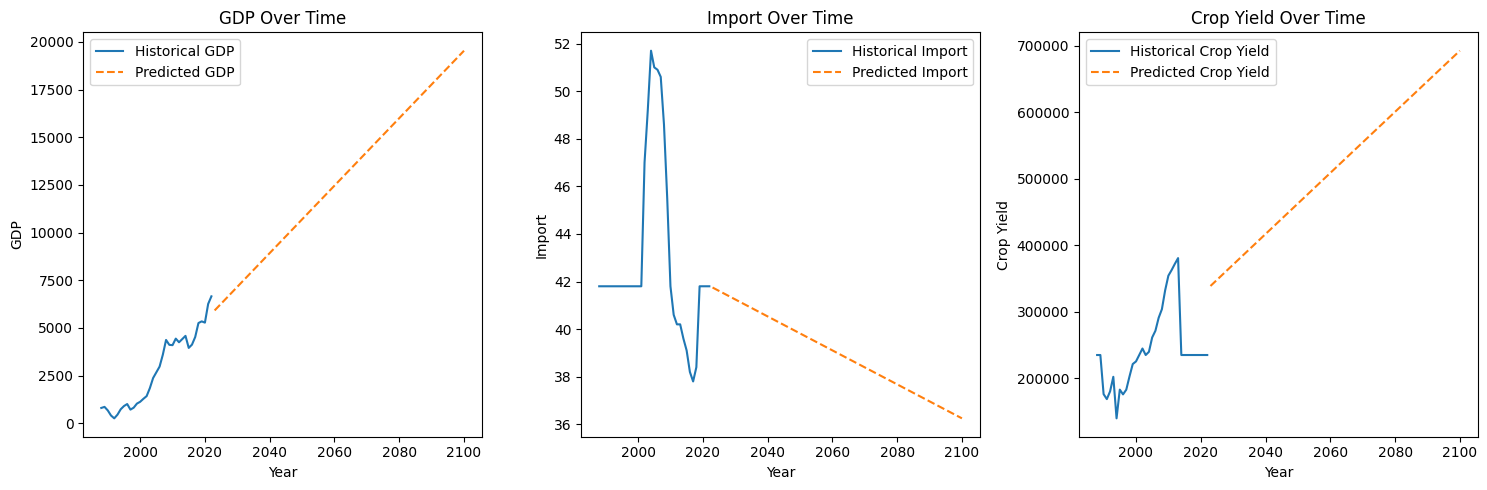

In [112]:
import matplotlib.pyplot as plt

# Extract historical data
historical_years = df_median['year']
historical_gdp = df_median['gdp']
historical_import = df_median['import']
historical_crop_y = df_median['crop_y']

# Future data from your predictions
future_years = future_forecasts['year']
future_gdp = future_forecasts['gdp']
future_import = future_forecasts['import']
future_crop_y = future_forecasts['crop_y']

# Plotting
plt.figure(figsize=(15, 5))

# GDP Plot
plt.subplot(1, 3, 1)
plt.plot(historical_years, historical_gdp, label='Historical GDP')
plt.plot(future_years, future_gdp, label='Predicted GDP', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()

# Import Plot
plt.subplot(1, 3, 2)
plt.plot(historical_years, historical_import, label='Historical Import')
plt.plot(future_years, future_import, label='Predicted Import', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Import')
plt.title('Import Over Time')
plt.legend()

# Crop Yield Plot
plt.subplot(1, 3, 3)
plt.plot(historical_years, historical_crop_y, label='Historical Crop Yield')
plt.plot(future_years, future_crop_y, label='Predicted Crop Yield', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.title('Crop Yield Over Time')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


These graph presents the forecasted trends of GDP, imports, and crop yield from 2023 to 2100, derived using a linear regression model. These projections form the basis for our predictive analysis of the prevalence of undernourishment. 

In [113]:
last_historical_data = df_features.iloc[-1].copy()

# Create a DataFrame for future years with non-changing features
non_changing_features = last_historical_data.drop(['gdp', 'import', 'crop_y', 'year'])
future_data_consistent = pd.DataFrame([non_changing_features] * len(future_forecasts), columns=non_changing_features.index)

# Reset the index to align with future_forecasts
future_data_consistent = future_data_consistent.reset_index(drop=True)

# Merge the consistent data with the future forecasts
combined_future_data = pd.concat([future_forecasts, future_data_consistent], axis=1)

# Ensure 'year' is from future_forecasts and drop any duplicate 'year' column if exists
combined_future_data = combined_future_data.loc[:,~combined_future_data.columns.duplicated()]
combined_future_data['year'] = future_forecasts['year']

# Reorder columns in combined_future_data
column_order=df_features.columns
combined_future_data = combined_future_data[column_order]
display(combined_future_data)


,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,2023,6.725203,189778.0,2333808.0,338990.661651,1159.3,5918.000795,41.747889
1,2024,6.725203,189778.0,2333808.0,343586.326664,1159.3,6094.889667,41.676484
2,2025,6.725203,189778.0,2333808.0,348181.991678,1159.3,6271.778539,41.605080
3,2026,6.725203,189778.0,2333808.0,352777.656691,1159.3,6448.667412,41.533675
4,2027,6.725203,189778.0,2333808.0,357373.321704,1159.3,6625.556284,41.462270
...,...,...,...,...,...,...,...,...
73,2096,6.725203,189778.0,2333808.0,674474.207609,1159.3,18830.888478,36.535356
74,2097,6.725203,189778.0,2333808.0,679069.872622,1159.3,19007.777351,36.463951
75,2098,6.725203,189778.0,2333808.0,683665.537635,1159.3,19184.666223,36.392547
76,2099,6.725203,189778.0,2333808.0,688261.202648,1159.3,19361.555095,36.321142


In [114]:
#training the model with training data from df_features
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
display

# Normalize training data
df_features_train_z, columns_means, columns_stds = normalize_z(df_features_train,columns_means=None, columns_stds=None)
display(df_features_train)


# Store the means and standard deviations
training_mean = columns_means
training_std = columns_stds

# Prepare features and targets
X_train = prepare_feature(df_features_train_z)
target_train = prepare_target(df_target_train)


# Gradient Descent
iterations = 3000
alpha = 0.001
beta = np.zeros((9, 1))
beta, J_storage = gradient_descent_linreg(X_train, target_train, beta, alpha, iterations)

beta[1]=0


# Make prediction
pred = predict_linreg(combined_future_data, beta,training_mean, training_std)
print(pred)


,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import
0,1988,2.366582,199820.0,1786742.0,235173.0,1068.88,805.05,41.8
2,1990,2.366582,199820.0,1786742.0,176310.0,958.69,675.74,41.8
3,1991,2.366582,199820.0,1786742.0,168855.0,1143.45,408.02,41.8
4,1992,226.005421,199820.0,1786742.0,180438.0,985.30,259.75,41.8
7,1995,7.793219,199820.0,1786742.0,183117.0,1386.94,903.99,41.8
8,1996,12.725478,199820.0,1786742.0,175963.0,1495.28,1009.97,41.8
9,1997,33.180274,199820.0,1786742.0,183020.0,967.05,717.38,41.8
10,1998,20.642859,274120.0,1375303.0,202992.0,1243.78,818.32,41.8
11,1999,0.389438,244569.0,1297046.0,221570.0,1292.95,1032.26,41.8
12,2000,0.050018,245881.0,1372353.0,225494.0,982.46,1127.64,41.8


[[4.70509468]
 [4.70172466]
 [4.69835463]
 [4.6949846 ]
 [4.69161457]
 [4.68824455]
 [4.68487452]
 [4.68150449]
 [4.67813446]
 [4.67476444]
 [4.67139441]
 [4.66802438]
 [4.66465435]
 [4.66128433]
 [4.6579143 ]
 [4.65454427]
 [4.65117424]
 [4.64780421]
 [4.64443419]
 [4.64106416]
 [4.63769413]
 [4.6343241 ]
 [4.63095408]
 [4.62758405]
 [4.62421402]
 [4.62084399]
 [4.61747397]
 [4.61410394]
 [4.61073391]
 [4.60736388]
 [4.60399386]
 [4.60062383]
 [4.5972538 ]
 [4.59388377]
 [4.59051375]
 [4.58714372]
 [4.58377369]
 [4.58040366]
 [4.57703364]
 [4.57366361]
 [4.57029358]
 [4.56692355]
 [4.56355353]
 [4.5601835 ]
 [4.55681347]
 [4.55344344]
 [4.55007342]
 [4.54670339]
 [4.54333336]
 [4.53996333]
 [4.53659331]
 [4.53322328]
 [4.52985325]
 [4.52648322]
 [4.5231132 ]
 [4.51974317]
 [4.51637314]
 [4.51300311]
 [4.50963309]
 [4.50626306]
 [4.50289303]
 [4.499523  ]
 [4.49615298]
 [4.49278295]
 [4.48941292]
 [4.48604289]
 [4.48267286]
 [4.47930284]
 [4.47593281]
 [4.47256278]
 [4.46919275]
 [4.46

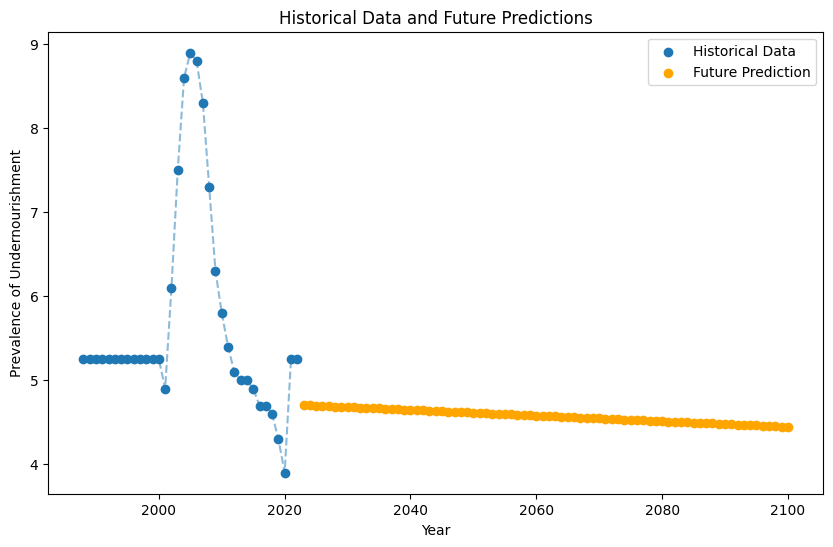

In [115]:
## visualising the historical and future trends

# Historical Data
x_historical = df_features['year']
y_historical = df_target

# Future Data
x_future = combined_future_data['year']
y_future = pred

# Plot Historical Data
plt.figure(figsize=(10, 6))
plt.scatter(x_historical, y_historical, label='Historical Data')
plt.plot(x_historical, y_historical, linestyle='--', alpha=0.5)

# Plot Future Data
plt.scatter(x_future, y_future, label='Future Prediction', color='orange')
plt.plot(x_future, y_future, linestyle='--', alpha=0.5, color='orange')



# Labeling the Plot
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment')
plt.title('Historical Data and Future Predictions')
plt.legend()

# Show Plot
plt.show()


## Evaluation of Model

#### Cross Validation

In [116]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming df_features and df_target are your complete datasets
kf = KFold(n_splits=5, shuffle=True, random_state=100)

mse_scores = []

for train_index, test_index in kf.split(df_features):
    # Split data
    df_features_train, df_features_test = df_features.iloc[train_index], df_features.iloc[test_index]
    df_target_train, df_target_test = df_target.iloc[train_index], df_target.iloc[test_index]

    # Normalize the features
    df_features_train_z, _, _ = normalize_z(df_features_train)

    # Prepare the features and targets
    X_train = prepare_feature(df_features_train_z)
    y_train = prepare_target(df_target_train)
    X_test = prepare_feature(df_features_test)
    y_test = prepare_target(df_target_test)

    # Initialize and run gradient descent
    beta = np.zeros((X_train.shape[1], 1))
    beta, _ = gradient_descent_linreg(X_train, y_train, beta, 0.001, 3000)

    # Make predictions
    pred = predict_linreg(df_features_test, beta)

    # Compute and store MSE
    mse = mean_squared_error(y_test, pred)
    mse_scores.append(mse)

# Calculate average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"Average Cross-validated MSE: {avg_mse}")


Average Cross-validated MSE: 0.37382014708912215


The code implements 5-fold cross-validation for linear regression using scikit-learn. It divides the dataset into five folds, iterates through each fold, and trains a linear regression model on the training set while evaluating its performance on the corresponding test set. Feature normalization is applied, and gradient descent is used to learn model coefficients. Mean Squared Error (MSE) is calculated for each fold, and the average MSE across all folds is computed, providing a more robust assessment of the model's predictive accuracy.

##### Result
The mse value is not very far of of the model's mse with train and test split, hence means that our model is not too overfitted to training data and is robust to model against unseen data. Thus our feature cleaning, type of model and training of the model are applied consistently across training, validation, and testing phases. Hence our model does produce accurate predictions.




#### Analysis of model result and what steps the government should take

As the graphs indicated, there's a strong correlation between Albania's economic health and its food security. With an increase in GDP, a decrease in the ratio of food imports, and an enhancement in crop yield, there's a marked decline in the prevalence of undernourishment. 

Notably, our feature analysis highlights the critical role of food imports in determining food security. This underscores the necessity for Albania to focus on bolstering its self-reliance in food production, reducing dependency on imports, and thereby enhancing its overall food security.

#### Limitations of our prediction model

##### Data Scarcity and Uniqueness:

- Albania's unique historical and geographical characteristics make finding comprehensive and comparable datasets challenging.
- The limited availability of extensive data specific to Albania restricts the depth and breadth of our analysis, potentially affecting the model's reliability and generalizability.

##### Imputation of Missing Data:

- To handle missing data, we used mean/median imputation, a necessary but imperfect solution.
- Attempts to supplement data with information from similar countries often fell short due to Albania's distinct context, limiting the accuracy and relevance of such substitutions.
- While this method helps in maintaining the dataset's structure, it may not accurately reflect the true variation and complexity of Albania's socio-economic conditions, leading to potential biases in our predictions.

##### Regional Variations in Food Security:

- Albania's diverse geographical landscape means that food security varies significantly across different regions.
- Our model, being national in scope, does not account for these regional disparities, which limits its utility in guiding localized policy interventions.

##### Impact of Outliers:

- Our dataset includes outliers representing significant, real-world events and disruptions in Albania.
- While these outliers are crucial for a realistic understanding, they complicate linear modeling and can skew results, affecting the precision of our predictions.

##### Modeling Complexities and Alternative Approaches:

- The linear regression model may not fully capture the complex and non-linear patterns in the data, as indicated by the low R-squared and high MSE values in our analysis.
- Exploring advanced machine learning techniques like XGBoost or regularization methods like Lasso regression could potentially provide more nuanced and accurate predictions, accommodating the unpredictable and dynamic nature of the factors affecting food security in Albania.

##### Socio-Economic Discrepancies:

- Our model assumes a uniform impact of economic changes across all population segments, which may not be the case in reality.
- The varying socio-economic statuses in Albania mean that improvements in GDP per capita may not equitably translate to better food security for all, especially for lower-income groups. This aspect remains unaddressed in our current model framework

#### Future Potential Expansion of our model

##### Geospatial Analysis:

If we can obtain geographically disaggregated data, performing a geospatial analysis could reveal regional differences in undernourishment and the impact of local factors like climate, soil quality, and access to markets.

##### Socio-Demographic Data:

Including socio-demographic variables (like age distribution, urban/rural split, education levels) might provide deeper insights into the vulnerability of different population groups to food insecurity.